# 1.テーマの設定

# **『深層学習を用いた東京都の平均気温予測』**

データ取得日(2021/10/25)以降の2021年の平均気温を予測することを目標とします。




# 2.データ収集

使用データ : 
[気象庁のデータ](https://www.data.jma.go.jp/gmd/risk/obsdl/index.php#)

期間2018/1/1~2021/10/25 の1日の平均気温データを使用。

# 3.アルゴリズムの選択

時系列データとなるため、時系列解析に効果的なLSTMを使用した深層学習モデルを作成する。

# 4.モデル作成

### **案①**

365 → 180 : ノードを半分にする

```
Model(
  (lstm): LSTM(365, 180, batch_first=True)
  (lstm_): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): ReLU()
  )
  (dense): Linear(in_features=180, out_features=1, bias=True)
)
```



### **案②**

２のべき乗の層を重ねる

```
Model(
  (lstm): LSTM(365, 128, batch_first=True)
  (lstm_): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): ReLU()
  )
  (dense1): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
  )
  (dense2): Sequential(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
  )
  (dense3): Sequential(
    (0): Linear(in_features=32, out_features=16, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
  )
  (dense4): Linear(in_features=16, out_features=1, bias=True)
)
```

### **案③**

半年の日数: 180  
3ヶ月の日数: 90  
1ヶ月の日数: 130  
1週間の日数: 4

```
Model(
  (lstm): LSTM(365, 180, batch_first=True)
  (lstm_): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): ReLU()
  )
  (dense1): Sequential(
    (0): Linear(in_features=180, out_features=90, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
  )
  (dense2): Sequential(
    (0): Linear(in_features=90, out_features=30, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
  )
  (dense3): Sequential(
    (0): Linear(in_features=30, out_features=7, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
  )
  (dense4): Linear(in_features=7, out_features=1, bias=True)
)
```


### **案④**

1年間の週数: 52  
1年間の半月の数: 24  
1年間の月数: 12  
季節の数: 4



>**lstm層：過去1年間(365日)のデータ→52(１年間の週の数)**  
>**dense1層：52 → 24(１年間の半月の数)**  
>**dense2層：24 → 12(1年間の月数)**  
>**dense3層：12 → 4(季節の数)**  
>**dense4層：4 → 1**

```
Model(
  (lstm): LSTM(365, 52, batch_first=True)
  (lstm_): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): ReLU()
  )
  (dense1): Sequential(
    (0): Linear(in_features=52, out_features=24, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
  )
  (dense2): Sequential(
    (0): Linear(in_features=24, out_features=12, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
  )
  (dense3): Sequential(
    (0): Linear(in_features=12, out_features=4, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
  )
  (dense4): Linear(in_features=4, out_features=1, bias=True)
)
```




# 5.学習結果
- 損失関数 → MSE

- 最適化関数 → AdamW

- 学習率(エポック数によって変化させる)  
  1〜50 → 1e-2  
  50〜100 → 1e-3  
  100〜200 → 1e-4 (実際のモデルの学習はエポック100で行ったので使用していない。Lossの推移を見るためだけに使用)  

- エポック → 100  
  Lossの推移より100がいいのではないかと判断した。



- モデルの評価 → MAE

  予測結果と実データの間にどれくらい差があるのか解釈がしやすいため、$MAE$を採用する。

$$MAE(Mean Absolute Error) = \frac{1}{n} \displaystyle \sum_{ i = 1 }^{ n } |\hat{y_i} - y_i|$$


### **＜結論＞** MAEの推移から最も汎化性能が高く、安定している案④を採択する。

## 案①

```
Model(
  (lstm): LSTM(365, 180, batch_first=True)
  (lstm_): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): ReLU()
  )
  (dense): Linear(in_features=180, out_features=1, bias=True)
)
```



### Lossの推移

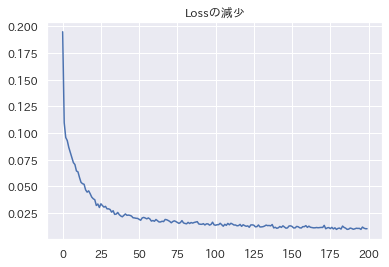

### MAEの推移

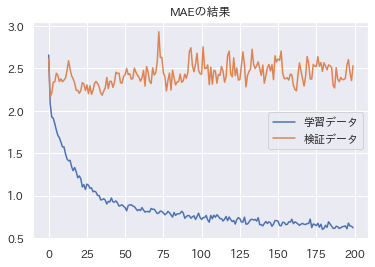


### 学習・検証結果

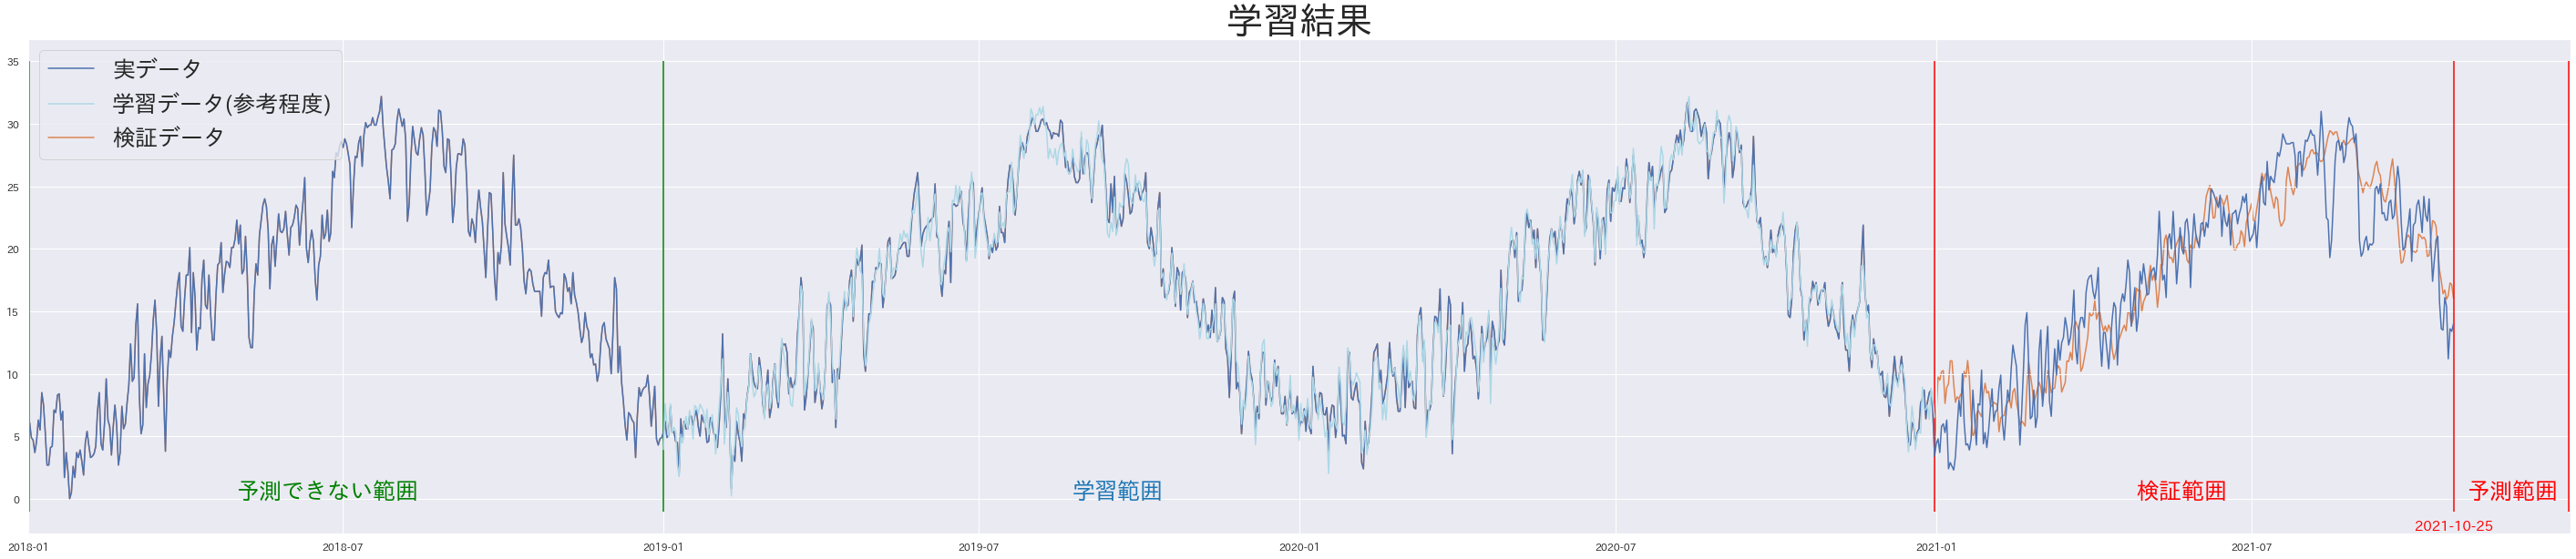

### 予測結果

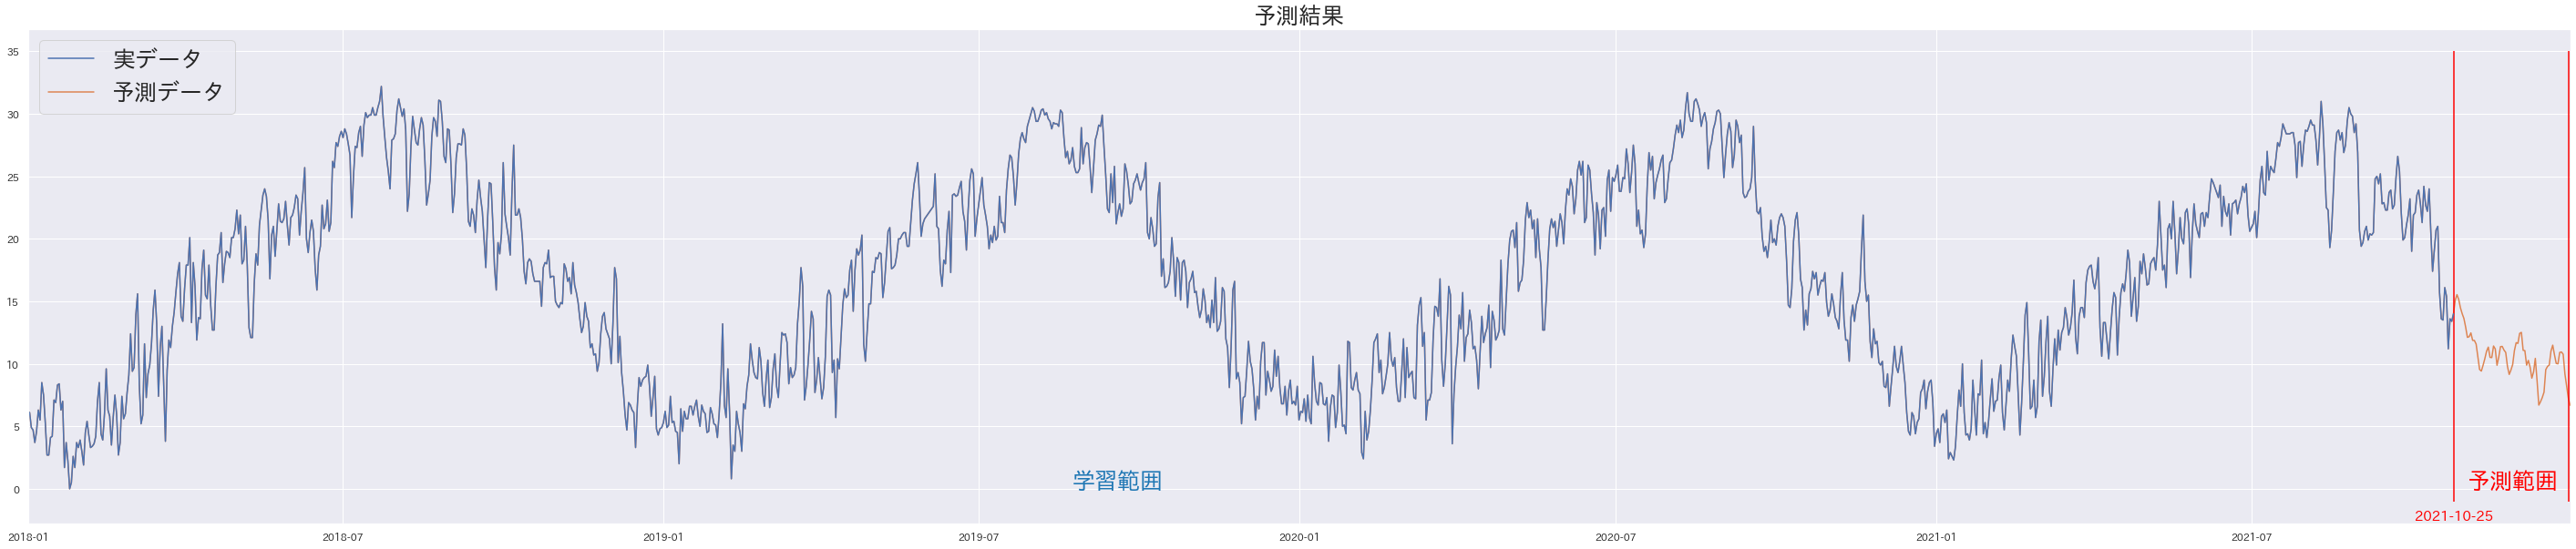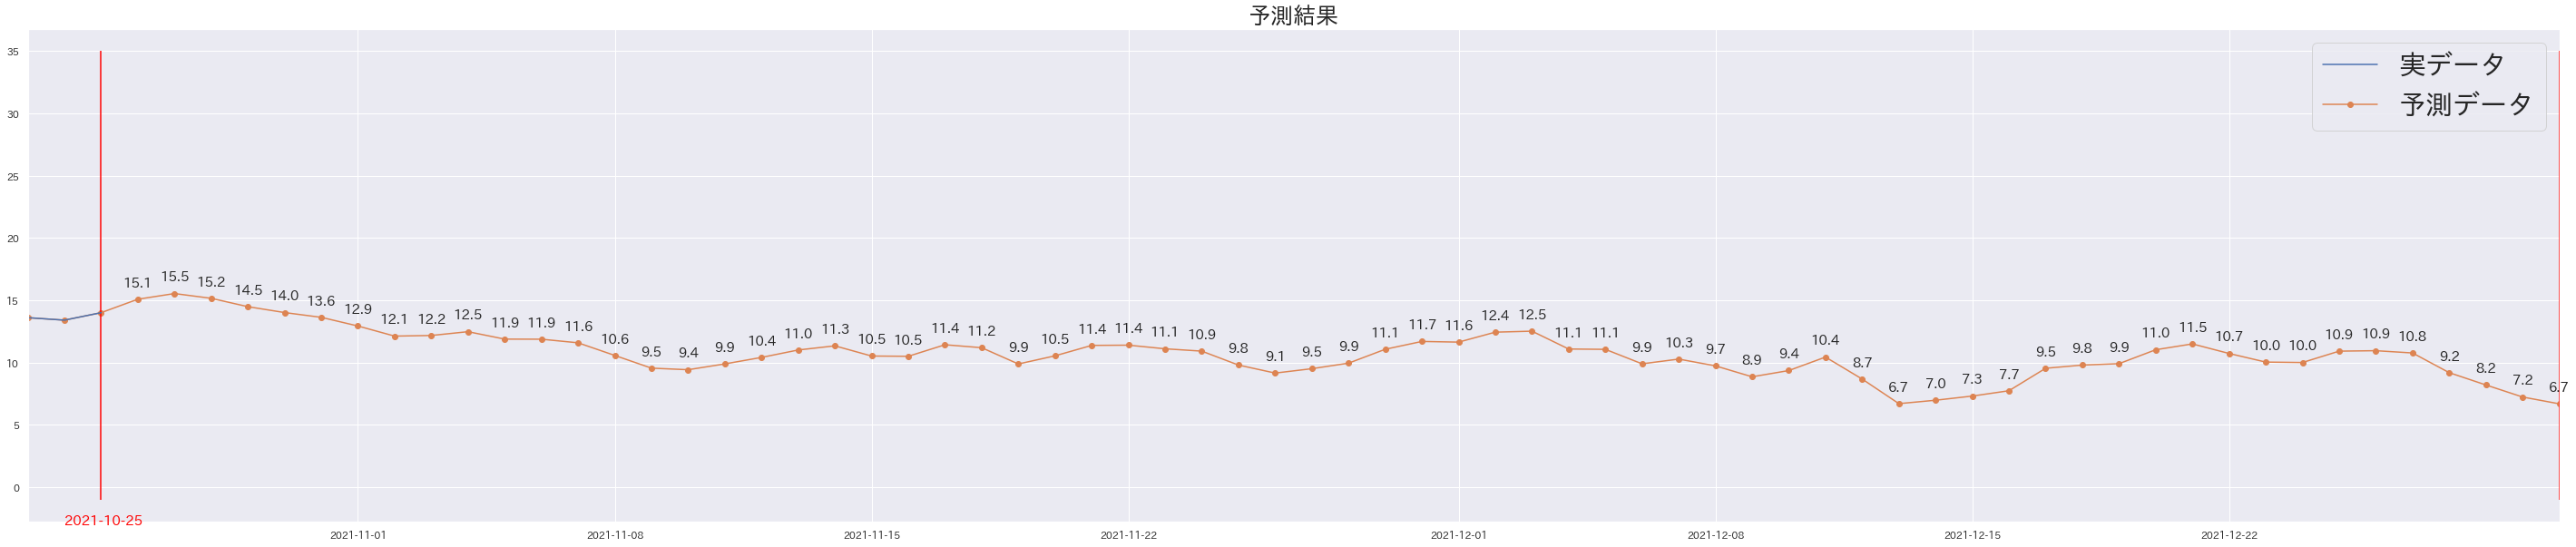

## 案②

```
Model(
  (lstm): LSTM(365, 128, batch_first=True)
  (lstm_): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): ReLU()
  )
  (dense1): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
  )
  (dense2): Sequential(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
  )
  (dense3): Sequential(
    (0): Linear(in_features=32, out_features=16, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
  )
  (dense4): Linear(in_features=16, out_features=1, bias=True)
)
```

### Lossの推移

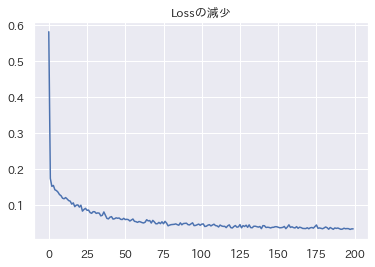

### MAEの推移

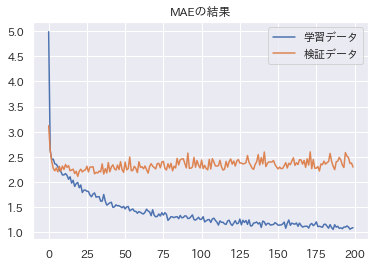

### 学習・検証結果

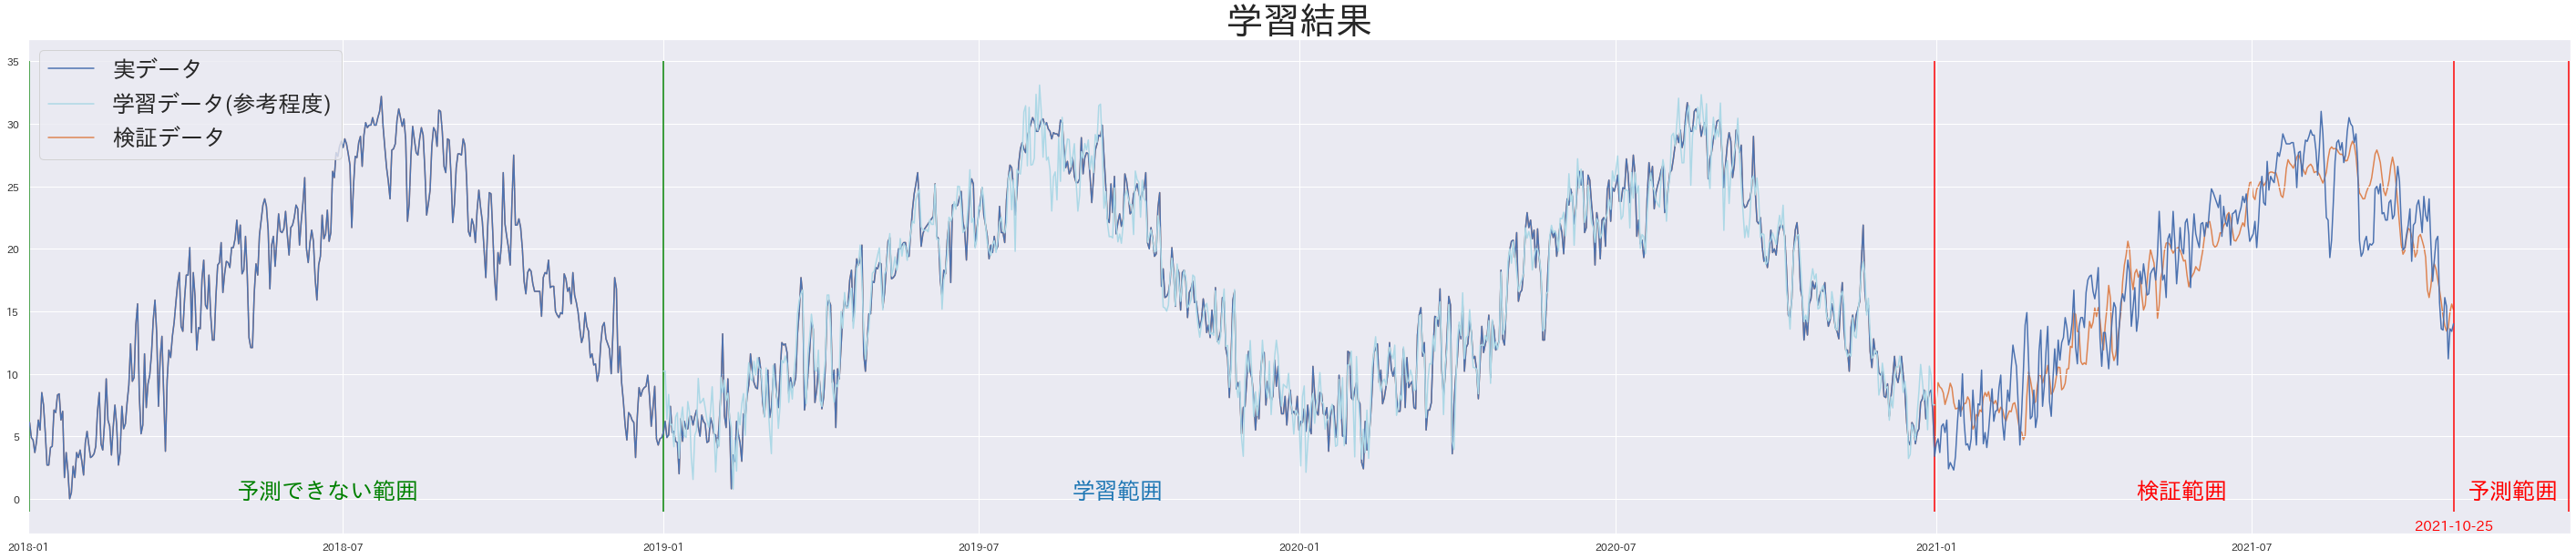

### 予測結果

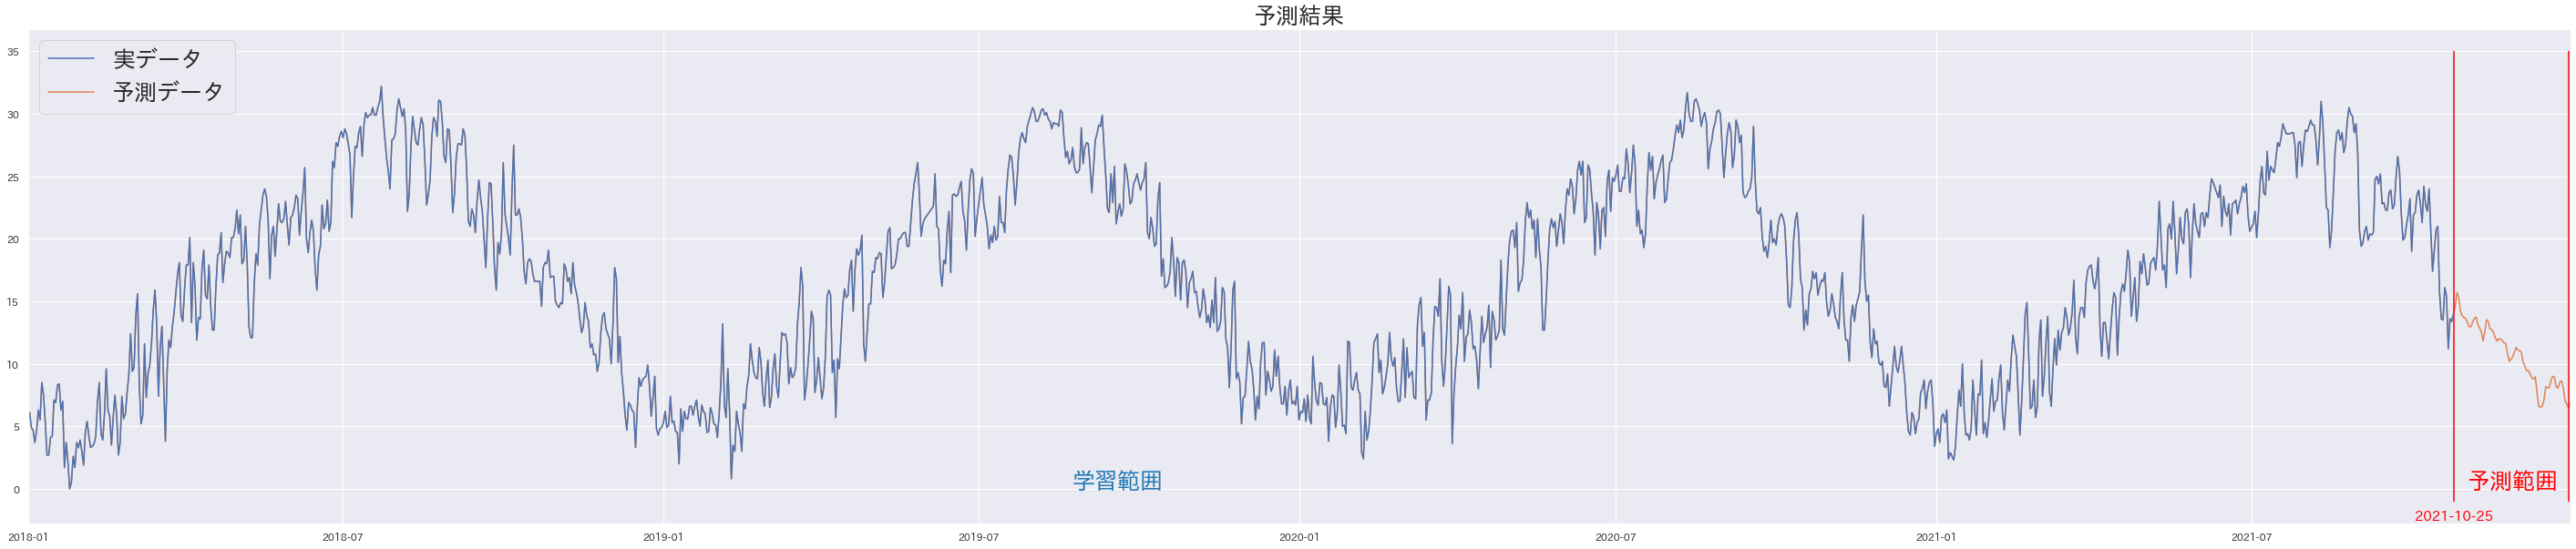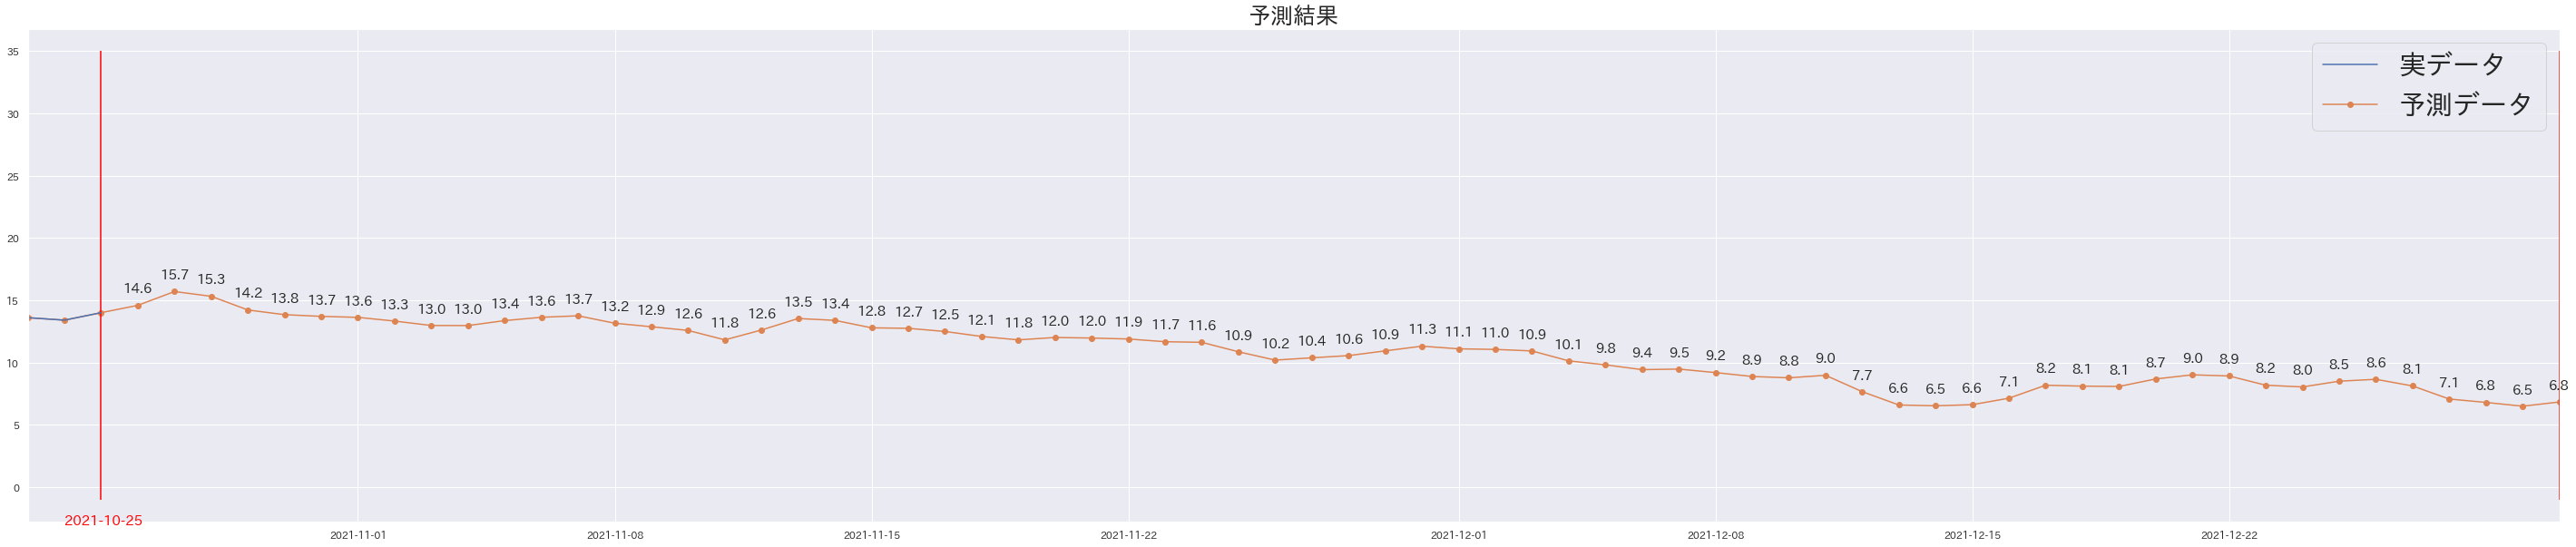

## 案③

```
Model(
  (lstm): LSTM(365, 180, batch_first=True)
  (lstm_): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): ReLU()
  )
  (dense1): Sequential(
    (0): Linear(in_features=180, out_features=90, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
  )
  (dense2): Sequential(
    (0): Linear(in_features=90, out_features=30, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
  )
  (dense3): Sequential(
    (0): Linear(in_features=30, out_features=7, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
  )
  (dense4): Linear(in_features=7, out_features=1, bias=True)
)
```

### Lossの推移

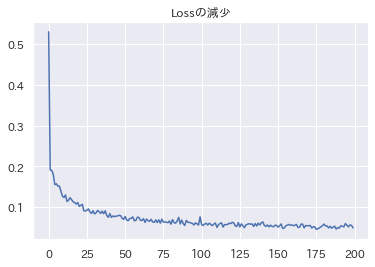

### MAEの推移

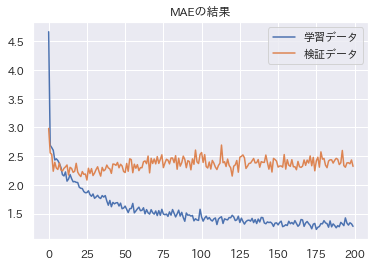

### 学習・検証結果

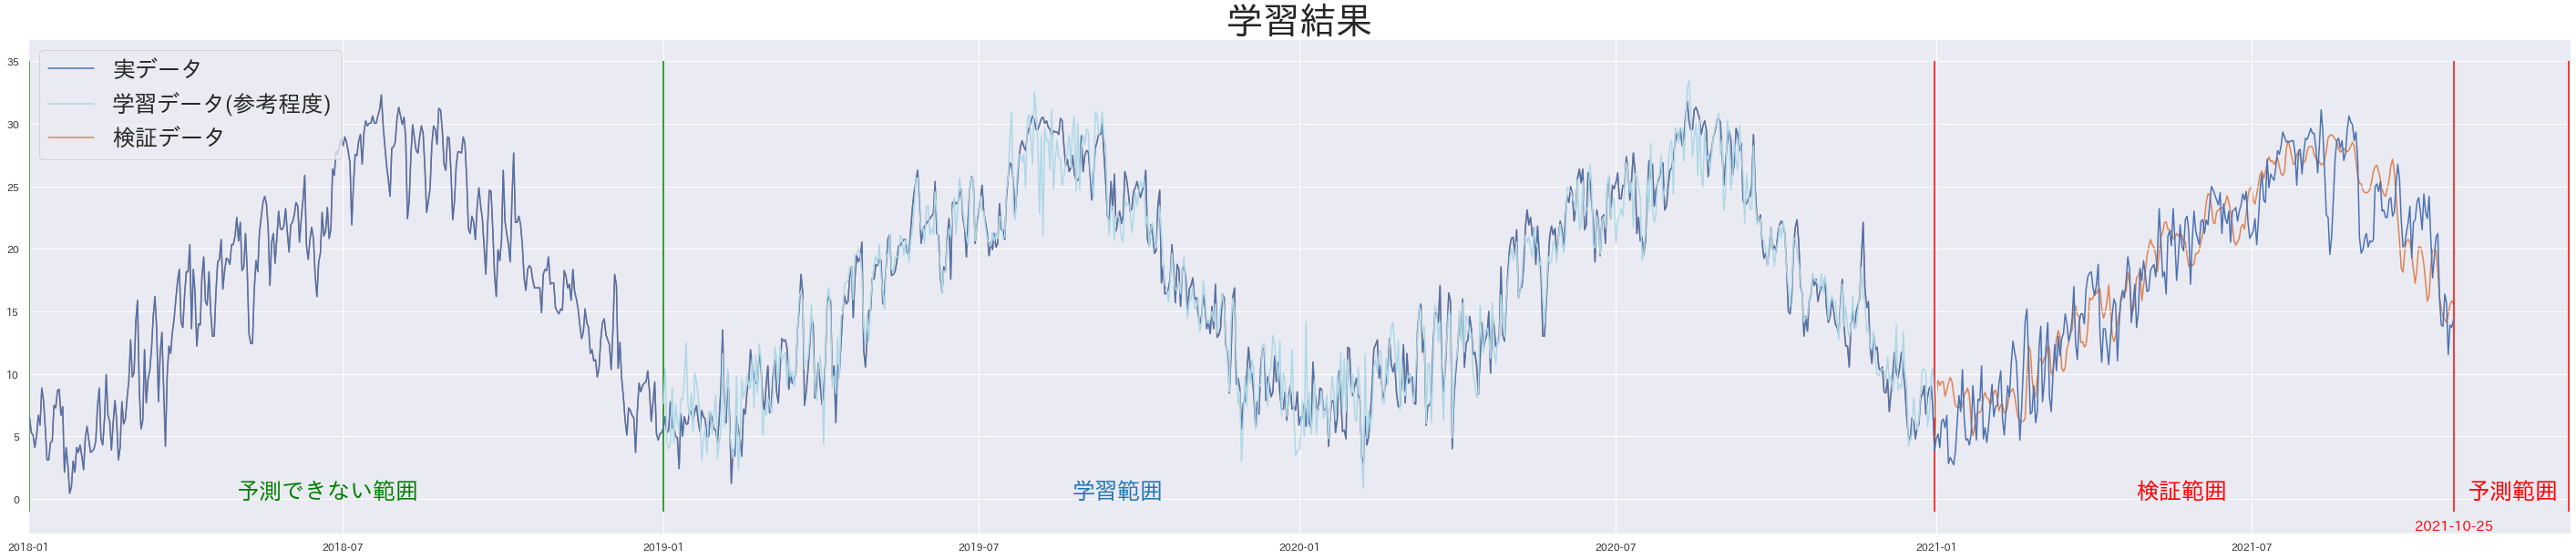

### 予測結果

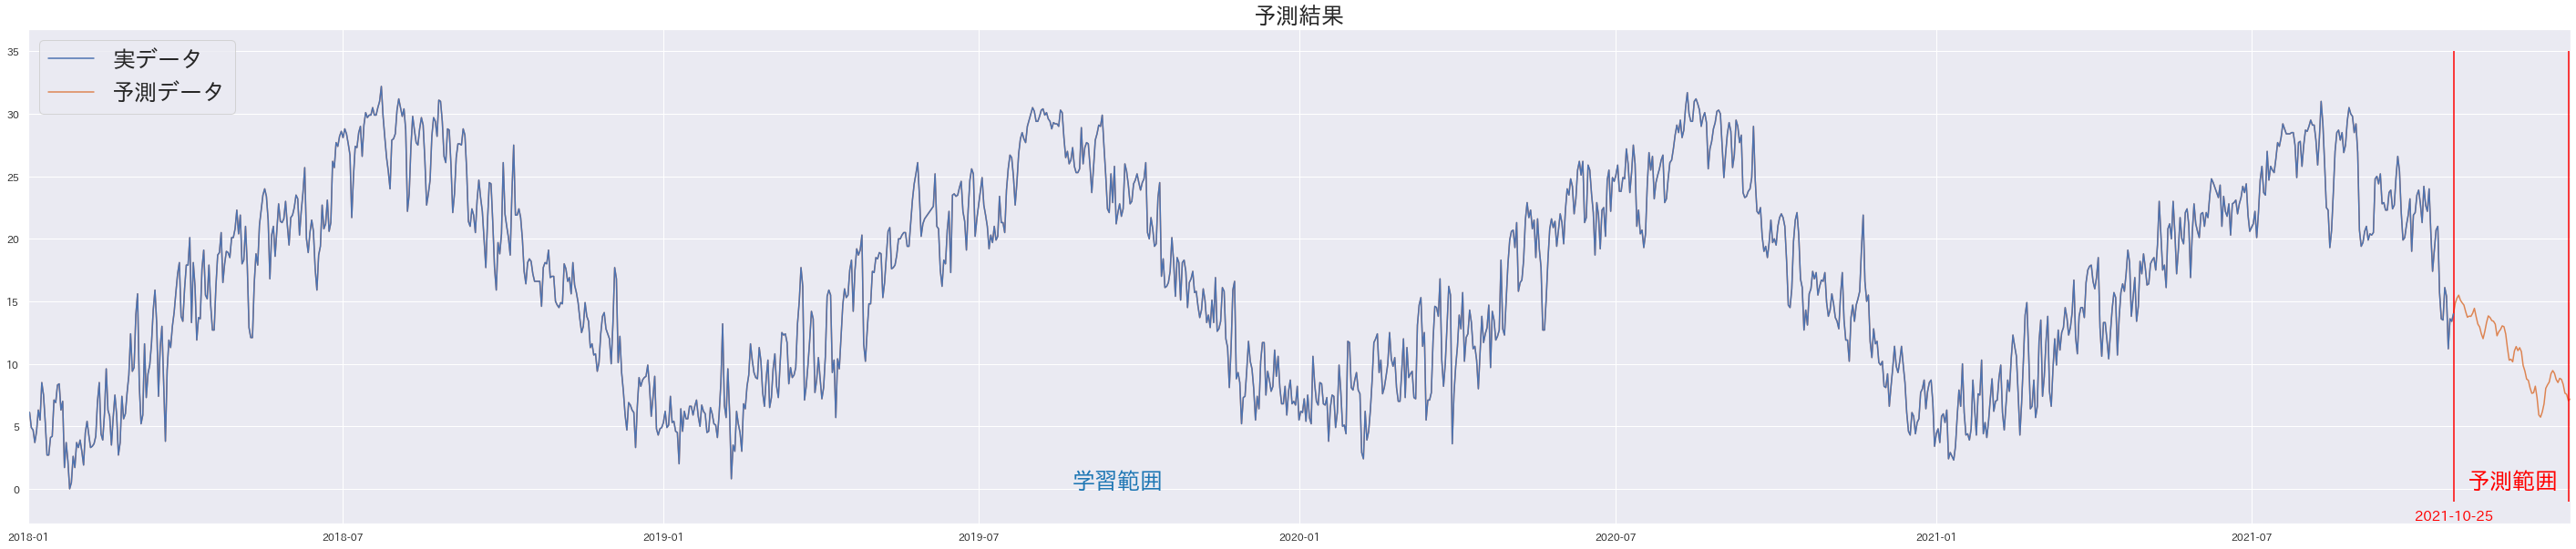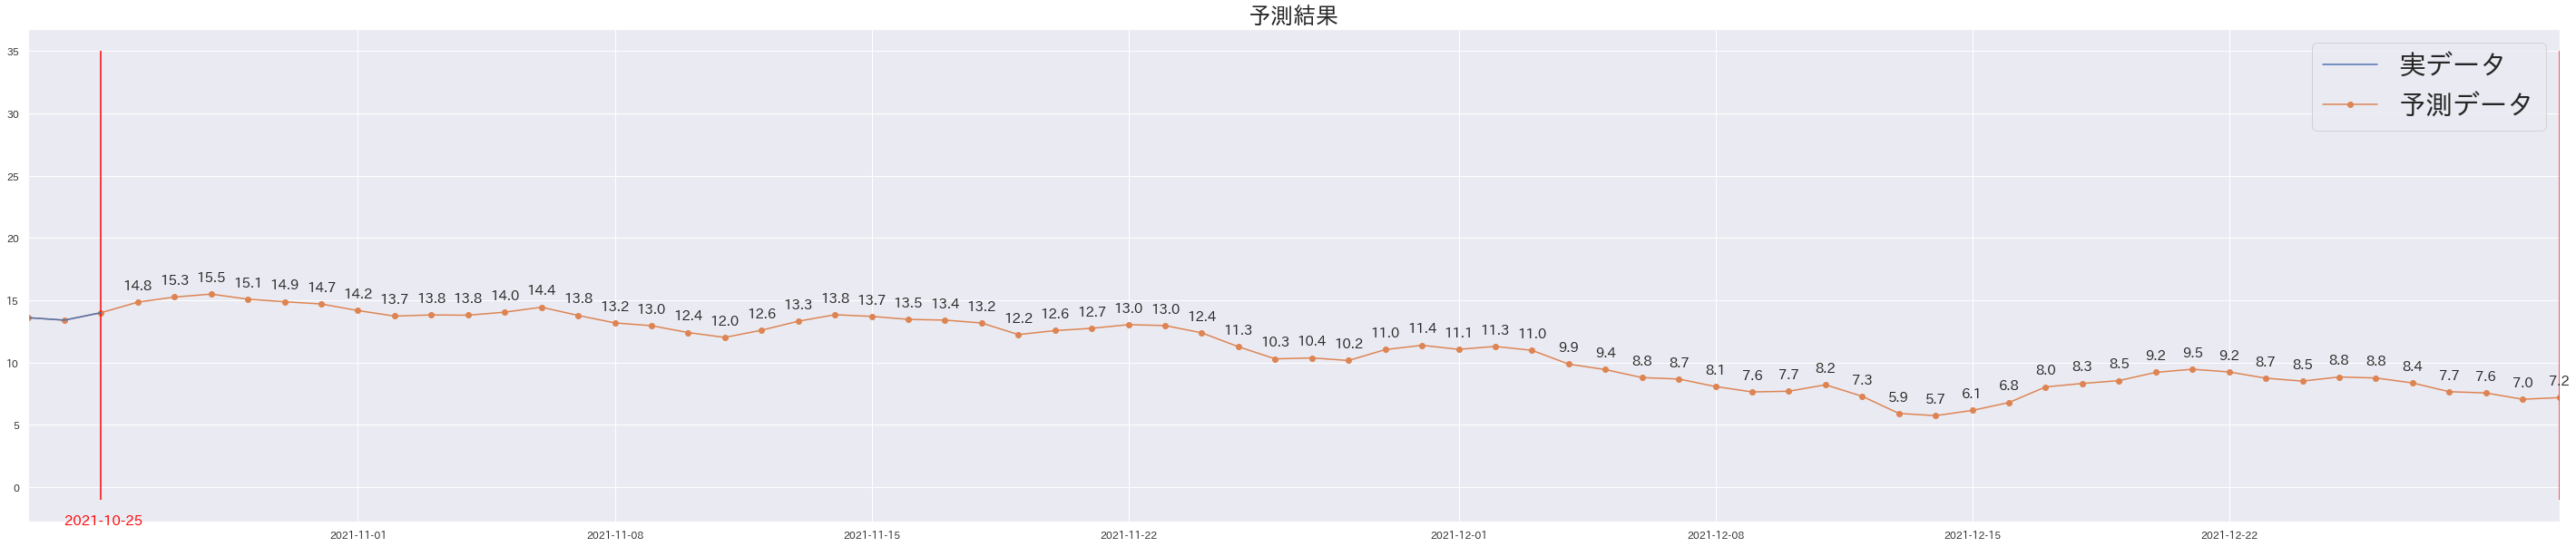

## **案④**

```
Model(
  (lstm): LSTM(365, 52, batch_first=True)
  (lstm_): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): ReLU()
  )
  (dense1): Sequential(
    (0): Linear(in_features=52, out_features=24, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
  )
  (dense2): Sequential(
    (0): Linear(in_features=24, out_features=12, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
  )
  (dense3): Sequential(
    (0): Linear(in_features=12, out_features=4, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
  )
  (dense4): Linear(in_features=4, out_features=1, bias=True)
)
```

### Lossの推移

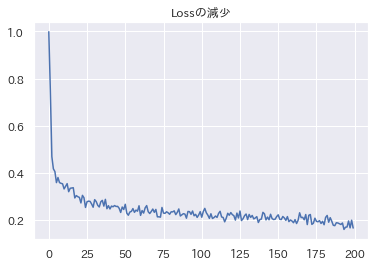

### MAEの推移

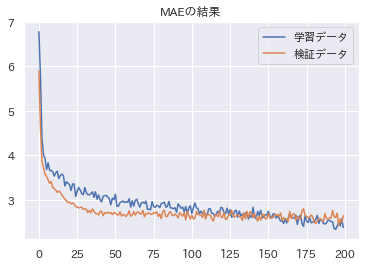

### 学習・検証結果

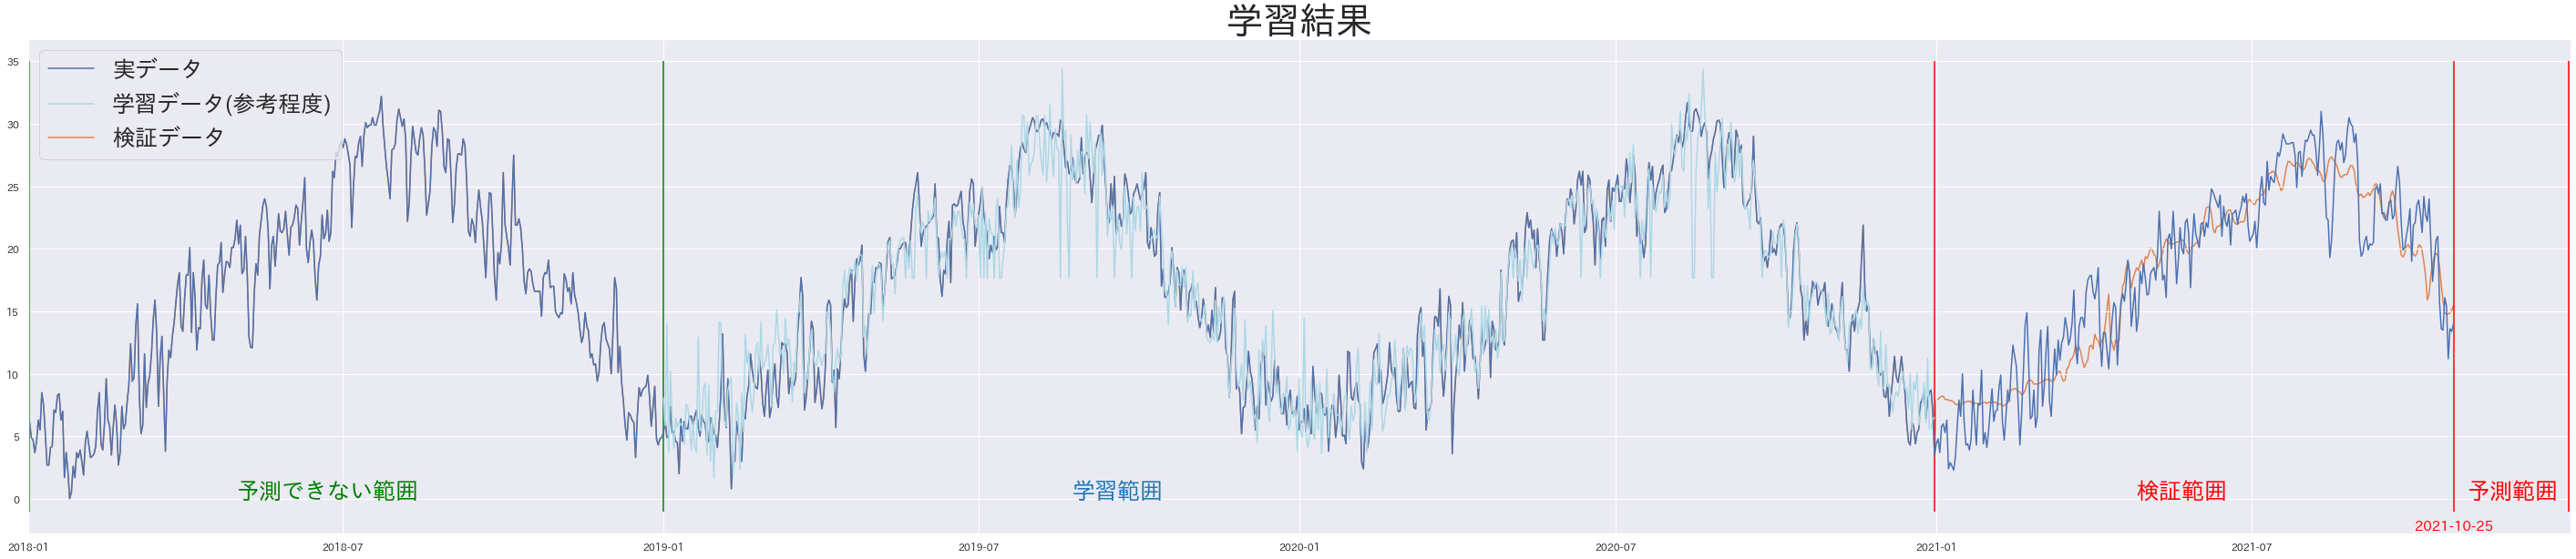

### 予測結果

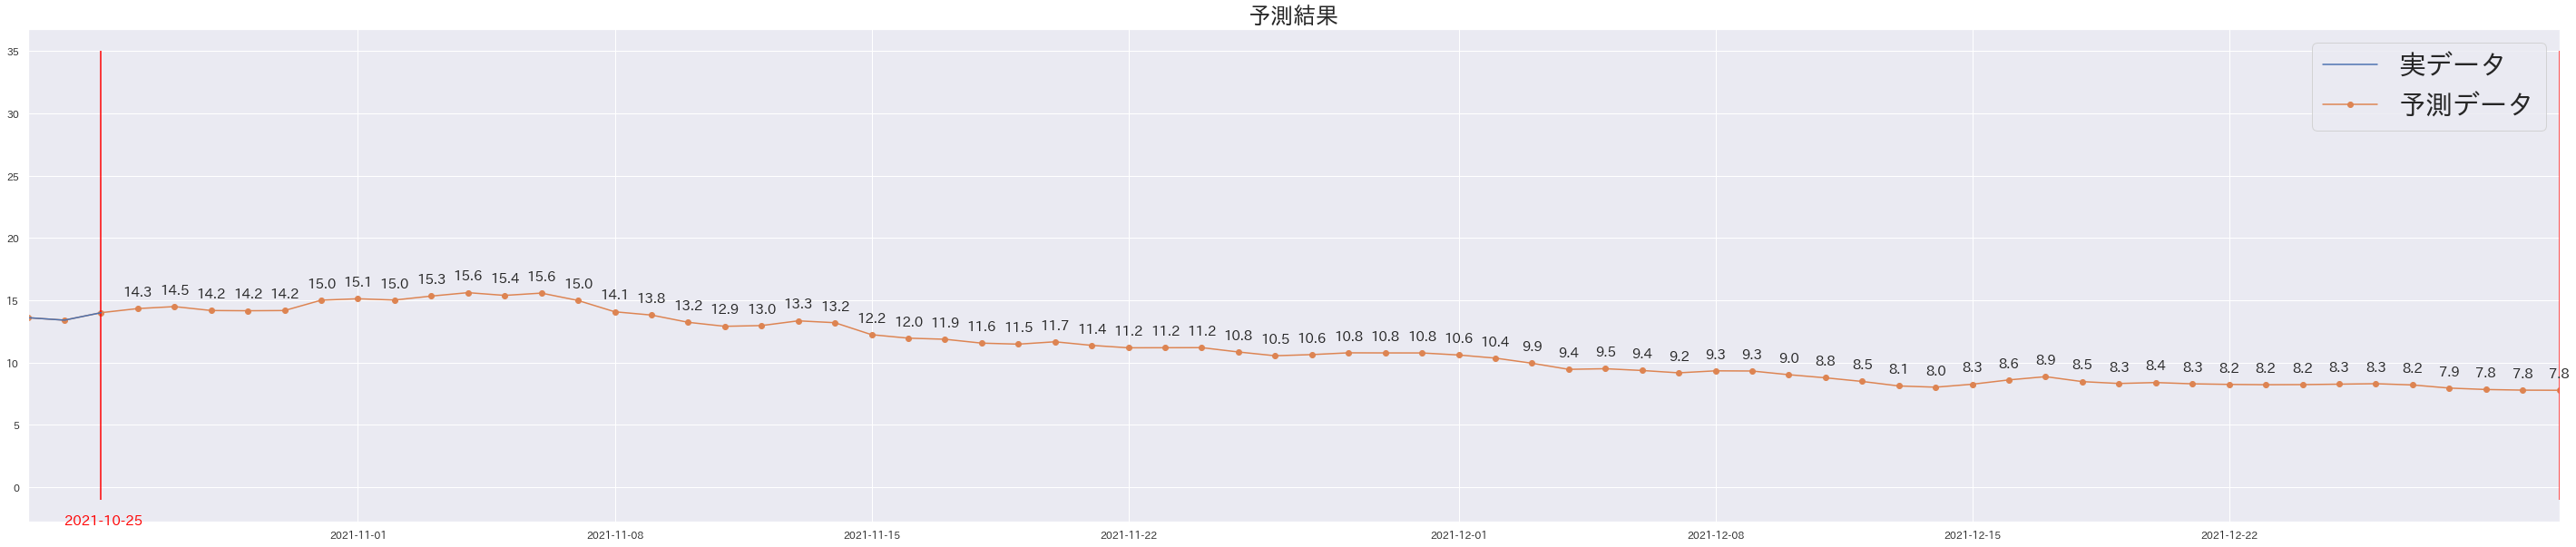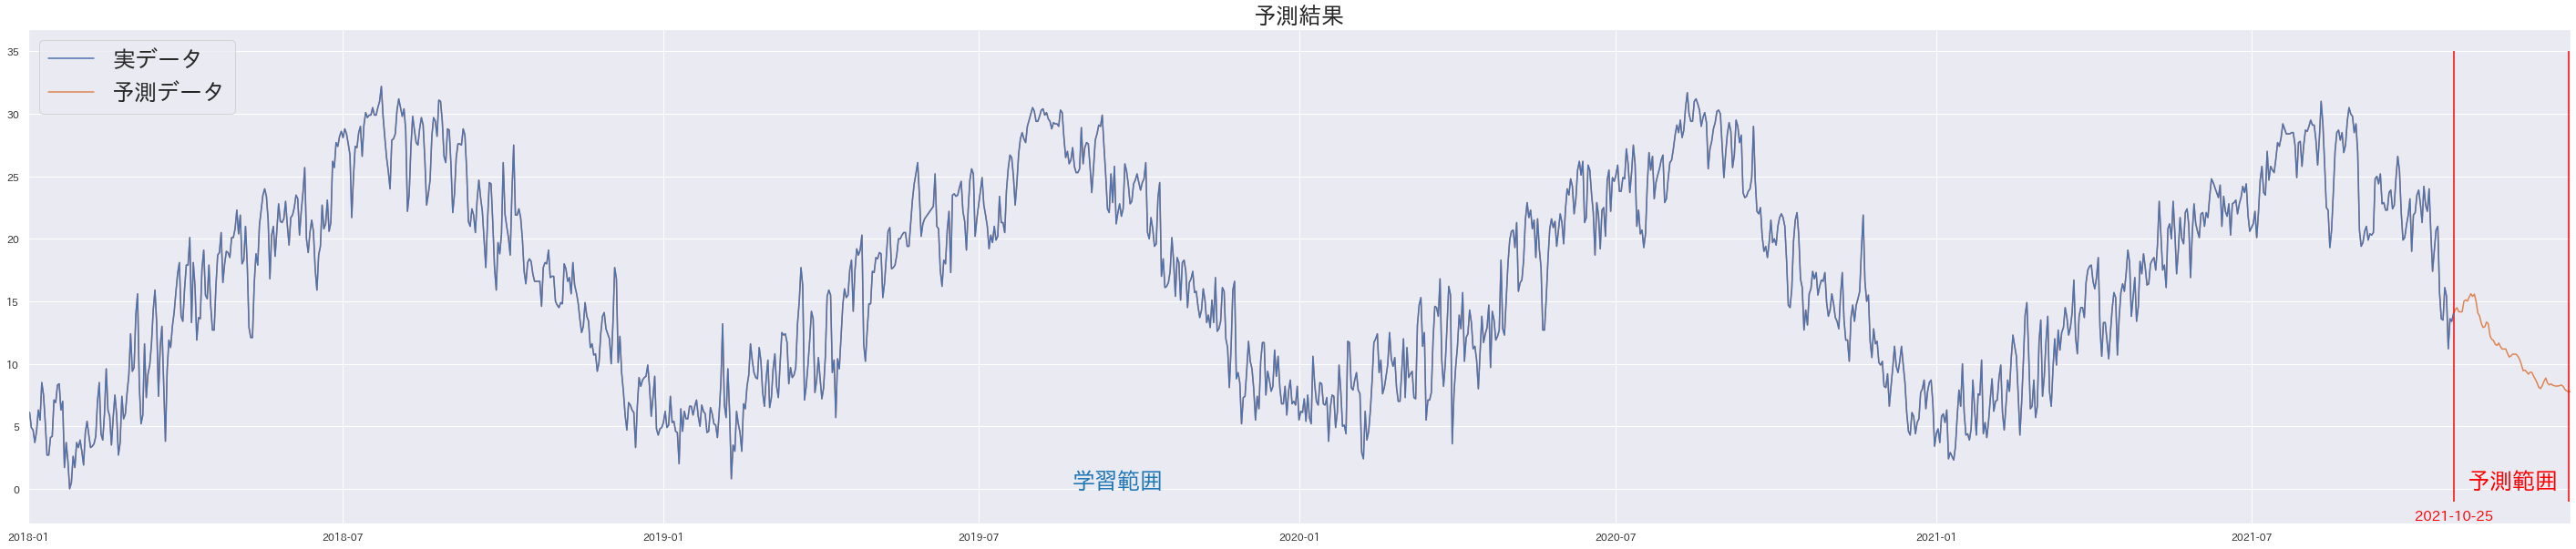

# 6.評価

案④  
$MAE=2.22(℃/日)$ → 予測は約2.22℃の誤差がある

# 7.考察

- データの正規化

  使用しなかった結果、全く精度が出なかった。  
  StanderdScalerを使用し、2018~2020年のデータを元に標準正規化を行ったところ、精度が飛躍的に向上した。


- モデル

>**<中間層>**  
ただ、層を重ねるのではなく、学習データに見合った層を重ねる必要がある。  
今回の場合は、月、週、季節などに基づいて層を重ねた所、予測が安定し、精度が向上した。


>**<ドロップアウト>**  
今回は記載していないが、ドロップアウトの割合も様々検証してみた。  
ドロップアウト層を使用しない、あるいは0.1と小さい値の場合、予測グラフの振動は少なく、なだらかな直線となった。  
一方、ドロップアウト層を0.2や0.5などと大きくすると、振動を再現することができる。


>**<活性化関数>**  
ReLUを使用。  
最初はReLUを使わないモデルを使用していたが、精度が全く出なかった。  
全層にReLUを挟んだ所、精度が向上した。


- エポック数  
  まず、200エポックで学習を回し、Lossのグラフを見て100くらいがいいのではないかと思い採択した。  
  Lossの下がり幅が緩やかになり始めた点（エポック50）も試してみたが、予測グラフがフィットしていなかった。

  この結果から、使用データが平均気温ということなので、数年間で平均気温の急激変化は起こらない事が考えられるため、やや過学習気味のほうが精度が上がるのではないかと考えている。  

- 学習率  
  実験的に学習率が小さくもしてみたが（例えば1e-4,1e-5など）、予測グラフはなだらかな直線となり、振動は再現できなかった。  局所解に陥ってしまったのではないかと考えている。

  今回はエポックの途中で変化させて、学習を行った。  
  1〜50 → 1e-2    
  50〜100 → 1e-3  
  100〜200 → 1e-4 (実際のモデルの学習はエポック100で行ったので使用していない。Lossの推移を見るためだけに使用)


# 8.今後の精度向上へ向けて

- [気象庁の論文](https://www.jma.go.jp/jma/kishou/books/nwpreport/64/chapter5.pdf)

  上記の論文を読んだ所、LSTMに加え、CNNを組み込んだモデルは非常に効果的であるという結果があった。
  今回のデータの場合でも、CNNを使うことで、予測日の周辺日も考慮できるのではないかと考えているので、今後精度を向上させるためにやってみたいと思う。

- 今回は平均気温のみ学習データを扱ったので、その他の最高気温、最低気温、降水量など説明変数を増やすことでより精度向上が図ることができるのではないかと思う。

- また、精度評価指標も工夫が必要なのではないかと思う。今回は1日毎のデータに対してMAEを採用したが、振動が激しいデータなので、週毎に予測データをまとめるなどして、さらに説明力をつけられるよう工夫していきたい。


# 9.提出用コード

## ①前準備

In [ ]:
# GPUを確認
!nvidia-smi

Fri Oct 29 15:49:51 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import copy
import seaborn as sns
import os
import glob
import re
import collections
import scipy
import math
import gc
import torch
from torch import nn
from torch.optim import AdamW, RMSprop
from sklearn.metrics import mean_squared_error, mean_absolute_error

import datetime
import random

In [ ]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 5.1 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=86ab7e28496d67d0bc013c122c6617f598279bc92d1b4c6d88629d5bd5e722f2
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [ ]:
import japanize_matplotlib
japanize_matplotlib.japanize()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pd.set_option('display.max_columns', 77)
pd.set_option('display.max_rows', 50)

print(matplotlib.rcParams['font.family'])

['IPAexGothic']


## ②データの読み込み・整理

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.getcwd()

'/content'

In [ ]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/AVILEN")

In [ ]:
dataset = pd.read_csv("data.csv")
dataset

ダウンロードした時刻：2021/10/27 23:34:03 Unnamed: 1 Unnamed: 2 Unnamed: 3
0                               NaN        NaN        NaN        NaN
1                               NaN         東京         東京         東京
2                               年月日    平均気温(℃)    平均気温(℃)    平均気温(℃)
3                               NaN        NaN       品質情報       均質番号
4                          2018/1/1        6.2          8          1
...                             ...        ...        ...        ...
1393                     2021/10/21       15.4          8          1
1394                     2021/10/22       11.2          8          1
1395                     2021/10/23       13.6          8          1
1396                     2021/10/24       13.4          8          1
1397                     2021/10/25         14          8          1

[1398 rows x 4 columns]

### columnsを設定

In [ ]:
dataset.columns = dataset.iloc[2].values
dataset

年月日  平均気温(℃)  平均気温(℃)  平均気温(℃)
0            NaN      NaN      NaN      NaN
1            NaN       東京       東京       東京
2            年月日  平均気温(℃)  平均気温(℃)  平均気温(℃)
3            NaN      NaN     品質情報     均質番号
4       2018/1/1      6.2        8        1
...          ...      ...      ...      ...
1393  2021/10/21     15.4        8        1
1394  2021/10/22     11.2        8        1
1395  2021/10/23     13.6        8        1
1396  2021/10/24     13.4        8        1
1397  2021/10/25       14        8        1

[1398 rows x 4 columns]

### 不要なcolumns・indexを削除

In [ ]:
# 使用するcolumnsを取得
use_columns = dataset.iloc[3].isna().values
use_columns

array([ True,  True, False, False])

In [ ]:
# columnsを削除
dataset = dataset.iloc[:,use_columns]
dataset

年月日  平均気温(℃)
0            NaN      NaN
1            NaN       東京
2            年月日  平均気温(℃)
3            NaN      NaN
4       2018/1/1      6.2
...          ...      ...
1393  2021/10/21     15.4
1394  2021/10/22     11.2
1395  2021/10/23     13.6
1396  2021/10/24     13.4
1397  2021/10/25       14

[1398 rows x 2 columns]

In [ ]:
# indexを削除
dataset = dataset.drop(index=[0,1,2,3], axis=0)
dataset

年月日 平均気温(℃)
4       2018/1/1     6.2
5       2018/1/2     6.1
6       2018/1/3     4.9
7       2018/1/4     4.7
8       2018/1/5     3.7
...          ...     ...
1393  2021/10/21    15.4
1394  2021/10/22    11.2
1395  2021/10/23    13.6
1396  2021/10/24    13.4
1397  2021/10/25      14

[1394 rows x 2 columns]

In [ ]:
# indexをリセット
dataset.index = range(len(dataset))
dataset

年月日 平均気温(℃)
0       2018/1/1     6.2
1       2018/1/2     6.1
2       2018/1/3     4.9
3       2018/1/4     4.7
4       2018/1/5     3.7
...          ...     ...
1389  2021/10/21    15.4
1390  2021/10/22    11.2
1391  2021/10/23    13.6
1392  2021/10/24    13.4
1393  2021/10/25      14

[1394 rows x 2 columns]

### dtypeを整える

In [ ]:

dataset["平均気温(℃)"] = dataset["平均気温(℃)"].values.astype("float")
dataset.dtypes

年月日         object
平均気温(℃)    float64
dtype: object

### Datetime変換

In [ ]:
dataset["年月日"] = pd.to_datetime(dataset["年月日"])
dataset.dtypes

年月日        datetime64[ns]
平均気温(℃)           float64
dtype: object

In [ ]:
dataset

年月日  平均気温(℃)
0    2018-01-01      6.2
1    2018-01-02      6.1
2    2018-01-03      4.9
3    2018-01-04      4.7
4    2018-01-05      3.7
...         ...      ...
1389 2021-10-21     15.4
1390 2021-10-22     11.2
1391 2021-10-23     13.6
1392 2021-10-24     13.4
1393 2021-10-25     14.0

[1394 rows x 2 columns]

## ③データの前理解(可視化)

### 平均気温推移

In [ ]:
#2018~2021
year_2018_2021 = pd.date_range(start="2018-01-01", end="2021-12-31", freq="D")

# 残りの日にち
left_date = len(year_2018_2021.date) - len(dataset["平均気温(℃)"])

In [ ]:
# demo用に乱数を発生
demo_num = random.choices([i*0.1 for i in range(50,120,1)], k=left_date) 

# demo用にデータフレーム
demo_df = pd.Series(demo_num)
demo_df = pd.concat([dataset["平均気温(℃)"][-1:], demo_df])    #つなげるために最後の気温だけ結合

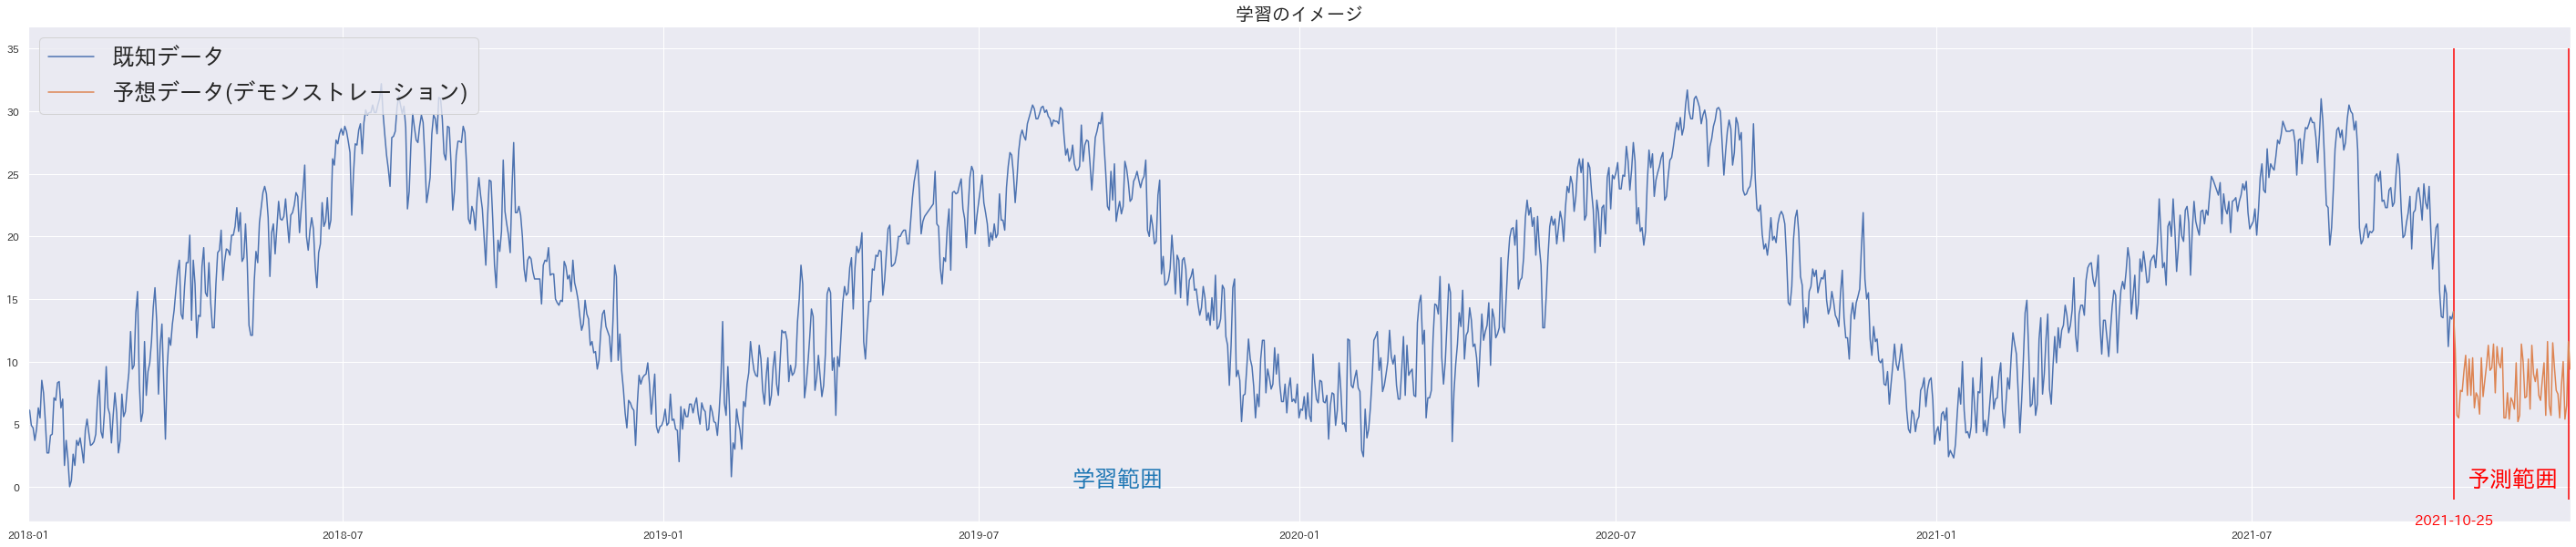

In [ ]:
plt.figure(figsize=(50,10))
sns.set(font='IPAexGothic', font_scale=1)

plt.title("学習のイメージ", size=20)

plt.plot(dataset["年月日"], dataset["平均気温(℃)"])
plt.plot(pd.Series(year_2018_2021.date[-(left_date+1):]), demo_df)      #ランダムなdemo
plt.legend(["既知データ", "予想データ(デモンストレーション)"], fontsize=25, loc="upper left")

plt.xlim([year_2018_2021.date[0], year_2018_2021.date[-1]])

plt.vlines(dataset["年月日"][-1:], ymin=-1, ymax=35, colors="red")
plt.vlines(year_2018_2021[-2], ymin=-1, ymax=35, colors="red")

plt.text(x=dataset["年月日"][600], y=0, s="学習範囲", c="tab:blue", size=25)
plt.text(x=year_2018_2021[-90], y=-3, s=datetime.datetime.date(year_2018_2021[-68]), c="red", size=15)
plt.text(x=year_2018_2021[-60], y=0, s="予測範囲", c="red", size=25)

plt.show()

### ヒストグラム

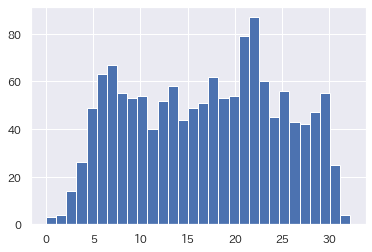

In [ ]:
dataset["平均気温(℃)"].hist(bins=30)
plt.show()

### バイオリンプロット

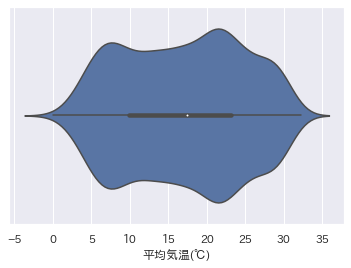

In [ ]:
sns.violinplot(dataset["平均気温(℃)"])
plt.show()

## ④学習用データの作成

In [ ]:
data = dataset.copy()
data

年月日  平均気温(℃)
0    2018-01-01      6.2
1    2018-01-02      6.1
2    2018-01-03      4.9
3    2018-01-04      4.7
4    2018-01-05      3.7
...         ...      ...
1389 2021-10-21     15.4
1390 2021-10-22     11.2
1391 2021-10-23     13.6
1392 2021-10-24     13.4
1393 2021-10-25     14.0

[1394 rows x 2 columns]

### 平均気温を標準化

2018~2020年のデータを元に標準化する

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data[data["年月日"]<datetime.datetime(2021,1,1)]["平均気温(℃)"].values.reshape(len(data[data["年月日"]<datetime.datetime(2021,1,1)]),1))

data["平均気温(℃)"] = scaler.transform(data["平均気温(℃)"].values.reshape(len(data),1))
data

年月日   平均気温(℃)
0    2018-01-01 -1.319461
1    2018-01-02 -1.332113
2    2018-01-03 -1.483938
3    2018-01-04 -1.509242
4    2018-01-05 -1.635762
...         ...       ...
1389 2021-10-21 -0.155472
1390 2021-10-22 -0.686858
1391 2021-10-23 -0.383209
1392 2021-10-24 -0.408513
1393 2021-10-25 -0.332601

[1394 rows x 2 columns]

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaler.fit(data["平均気温(℃)"].values.reshape(len(data),1))
# data["平均気温(℃)"] = scaler.transform(data["平均気温(℃)"].values.reshape(len(data),1))
# data

### 学習用データと検証用データに分割

In [ ]:
# train(2018~2020年)とtest(2021年)に分割
train_data = data[data["年月日"]<datetime.datetime(2021,1,1)]
test_data = data[data["年月日"]>=datetime.datetime(2021,1,1)]

In [ ]:
train_data

年月日   平均気温(℃)
0    2018-01-01 -1.319461
1    2018-01-02 -1.332113
2    2018-01-03 -1.483938
3    2018-01-04 -1.509242
4    2018-01-05 -1.635762
...         ...       ...
1091 2020-12-27 -1.117028
1092 2020-12-28 -1.028464
1093 2020-12-29 -1.003160
1094 2020-12-30 -1.230897
1095 2020-12-31 -1.673718

[1096 rows x 2 columns]

In [ ]:
test_data

年月日   平均気温(℃)
1096 2021-01-01 -1.547198
1097 2021-01-02 -1.496590
1098 2021-01-03 -1.635762
1099 2021-01-04 -1.370069
1100 2021-01-05 -1.344765
...         ...       ...
1389 2021-10-21 -0.155472
1390 2021-10-22 -0.686858
1391 2021-10-23 -0.383209
1392 2021-10-24 -0.408513
1393 2021-10-25 -0.332601

[298 rows x 2 columns]

### シークエンスデータを作成

In [ ]:
# 学習させる日数
input_size = 365
input_size

365

In [ ]:
def Sequence_Data(data, num_sequence=input_size):
    
    data = torch.tensor(data.values)
    sequence_data = []
    num_data = len(data)

    for i in range(num_data - num_sequence):
        # 1個ずらして、シーケンス分のデータを取得していく
        train = data[i : i+num_sequence]

        valid = data[i+num_sequence : i+num_sequence+1]
        # シーケンスデータとラベルデータをタプルとして取得していく
        sequence_data.append((train, valid))

    return sequence_data

In [ ]:
sequence_train_data = Sequence_Data(train_data["平均気温(℃)"])
sequence_train_data[0]

(tensor([-1.3195, -1.3321, -1.4839, -1.5092, -1.6358, -1.5219, -1.3068, -1.4080,
         -1.0285, -1.1550, -1.4333, -1.7623, -1.7623, -1.5852, -1.5725, -1.2056,
         -1.2309, -1.0538, -1.0411, -1.3068, -1.2182, -1.8888, -1.6358, -1.8255,
         -2.1039, -2.0406, -1.7749, -1.8888, -1.6358, -1.6864, -1.6105, -1.7243,
         -1.8635, -1.5345, -1.4207, -1.5598, -1.6864, -1.6737, -1.6484, -1.5725,
         -1.2182, -1.0285, -1.5472, -1.6105, -1.3448, -0.8893, -1.3068, -1.3701,
         -1.6611, -1.3827, -1.1550, -1.3574, -1.7623, -1.6358, -1.1676, -1.3954,
         -1.3448, -1.1297, -0.9526, -0.5350, -0.9146, -0.8766, -0.3453, -0.1302,
         -1.0538, -1.4460, -1.3574, -0.6363, -1.1803, -0.9399, -0.8513, -0.6363,
         -0.2946, -0.0922, -0.4338, -1.1676, -0.6742, -0.4591, -1.0411, -1.6231,
         -0.9019, -0.5983, -0.6742, -0.4591, -0.3199, -0.1175,  0.0723,  0.1861,
         -0.3579, -0.4085, -0.0796,  0.1608,  0.1608,  0.4392, -0.4212,  0.1861,
         -0.0543, -0.5983, -

In [ ]:
print("シーケンスの長さ: ", len(sequence_train_data))
print("(学習データ,予測データ)で格納されている: ", len(sequence_train_data[0]))

print("学習データの日数: ", sequence_train_data[0][0].shape)
print("予測データ: ", sequence_train_data[0][1].shape)

シーケンスの長さ:  731
(学習データ,予測データ)で格納されている:  2
学習データの日数:  torch.Size([365])
予測データ:  torch.Size([1])


## ⑤モデルの作成

In [ ]:
# # 案①
# class Model(nn.Module):
#     def __init__(self, input_size=input_size, hidden_size=180, output_size=1):
#         super().__init__()

#         self.lstm = nn.LSTM(input_size = input_size,
#                               hidden_size = hidden_size,
#                               batch_first = True)

#         self.lstm_ = nn.Sequential(
#                                   nn.Dropout(0.2),
#                                   nn.ReLU()
#                                 )

#         self.dense = nn.Linear(in_features=180, out_features=output_size)

#     def forward(self, x):
#         output,_ = self.lstm(x, None)
#         output = self.lstm_(output)
#         output = self.dense(output[:, -1, :])

#         return output

In [ ]:
# # 案②(2のべき乗の層を重ねた)
# class Model(nn.Module):
#     def __init__(self, input_size=input_size, hidden_size=128, output_size=1):
#         super().__init__()

#         self.lstm = nn.LSTM(input_size = input_size,
#                               hidden_size = hidden_size,
#                               batch_first = True)

#         self.lstm_ = nn.Sequential(
#                                   nn.Dropout(0.2),
#                                   nn.ReLU()
#                                 )

#         self.dense1 = nn.Sequential(
#                                       nn.Linear(in_features=hidden_size, out_features=64),
#                                       nn.ReLU(),
#                                       nn.Dropout(0.2)
#                                     )

#         self.dense2 = nn.Sequential(
#                                       nn.Linear(in_features=64, out_features=32),
#                                       nn.ReLU(),
#                                       nn.Dropout(0.1)
#                                     )

#         self.dense3 = nn.Sequential(
#                               nn.Linear(in_features=32, out_features=16),
#                               nn.ReLU(),
#                               nn.Dropout(0.1)
#                             )

#         self.dense4 = nn.Linear(in_features=16, out_features=output_size)

#     def forward(self, x):
#         output,_ = self.lstm(x, None)
#         output = self.lstm_(output)
#         output = self.dense1(output[:, -1, :])
#         output = self.dense2(output)
#         output = self.dense3(output)
#         output = self.dense4(output)

#         return output

In [ ]:
# # 案③
# class Model(nn.Module):
#     def __init__(self, input_size=input_size, hidden_size=180, output_size=1):
#         super().__init__()

#         self.lstm = nn.LSTM(input_size = input_size,
#                               hidden_size = hidden_size,
#                               batch_first = True)

#         self.lstm_ = nn.Sequential(
#                                   nn.Dropout(0.2),
#                                   nn.ReLU()
#                                 )

#         self.dense1 = nn.Sequential(
#                                       nn.Linear(in_features=hidden_size, out_features=90),
#                                       nn.ReLU(),
#                                       nn.Dropout(0.2)
#                                     )

#         self.dense2 = nn.Sequential(
#                                       nn.Linear(in_features=90, out_features=30),
#                                       nn.ReLU(),
#                                       nn.Dropout(0.1)
#                                     )

#         self.dense3 = nn.Sequential(
#                               nn.Linear(in_features=30, out_features=7),
#                               nn.ReLU(),
#                               nn.Dropout(0.1)
#                             )

#         self.dense4 = nn.Linear(in_features=7, out_features=1)

#     def forward(self, x):
#         output,_ = self.lstm(x, None)
#         output = self.lstm_(output)
#         output = self.dense1(output[:, -1, :])
#         output = self.dense2(output)
#         output = self.dense3(output)
#         output = self.dense4(output)

#         return output

In [ ]:
print("1年間の週数:", 365//7)
print("1年間の半月の数:",2*(365//30))
print("1年間の月数:", 365//30)
print("季節の数:", 4)

1年間の週数: 52
1年間の半月の数: 24
1年間の月数: 12
季節の数: 4


In [ ]:
# 案④
class Model(nn.Module):
    def __init__(self, input_size=input_size, hidden_size=52, output_size=1):
        super().__init__()

        self.lstm = nn.LSTM(input_size = input_size,
                              hidden_size = hidden_size,
                              batch_first = True)

        self.lstm_ = nn.Sequential(
                                  nn.Dropout(0.2),
                                  nn.ReLU()
                                )

        self.dense1 = nn.Sequential(
                                      nn.Linear(in_features=hidden_size, out_features=24),
                                      nn.ReLU(),
                                      nn.Dropout(0.2)
                                    )

        self.dense2 = nn.Sequential(
                                      nn.Linear(in_features=24, out_features=12),
                                      nn.ReLU(),
                                      nn.Dropout(0.1)
                                    )

        self.dense3 = nn.Sequential(
                              nn.Linear(in_features=12, out_features=4),
                              nn.ReLU(),
                              nn.Dropout(0.1)
                            )

        self.dense4 = nn.Linear(in_features=4, out_features=1)

    def forward(self, x):
        output,_ = self.lstm(x, None)
        output = self.lstm_(output)
        output = self.dense1(output[:, -1, :])
        output = self.dense2(output)
        output = self.dense3(output)
        output = self.dense4(output)

        return output

In [ ]:
model = Model().double()
model

Model(
  (lstm): LSTM(365, 52, batch_first=True)
  (lstm_): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): ReLU()
  )
  (dense1): Sequential(
    (0): Linear(in_features=52, out_features=24, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
  )
  (dense2): Sequential(
    (0): Linear(in_features=24, out_features=12, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
  )
  (dense3): Sequential(
    (0): Linear(in_features=12, out_features=4, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
  )
  (dense4): Linear(in_features=4, out_features=1, bias=True)
)

## ⑥モデルの学習・検証

In [ ]:
# cudaに渡す準備
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
start_index = data["年月日"].index[data["年月日"]==test_data["年月日"].iloc[0]].values[0]
start_index

1096

In [ ]:
# 予測結果を格納する空箱を作成
test_empty_data = test_data.copy()
test_empty_data["平均気温(℃)"]=0
test_empty_data

年月日  平均気温(℃)
1096 2021-01-01        0
1097 2021-01-02        0
1098 2021-01-03        0
1099 2021-01-04        0
1100 2021-01-05        0
...         ...      ...
1389 2021-10-21        0
1390 2021-10-22        0
1391 2021-10-23        0
1392 2021-10-24        0
1393 2021-10-25        0

[298 rows x 2 columns]

In [ ]:
# シークエンスデータを作成
sequence_test_data = pd.concat([train_data, test_empty_data])
sequence_test_data

年月日   平均気温(℃)
0    2018-01-01 -1.319461
1    2018-01-02 -1.332113
2    2018-01-03 -1.483938
3    2018-01-04 -1.509242
4    2018-01-05 -1.635762
...         ...       ...
1389 2021-10-21  0.000000
1390 2021-10-22  0.000000
1391 2021-10-23  0.000000
1392 2021-10-24  0.000000
1393 2021-10-25  0.000000

[1394 rows x 2 columns]

In [ ]:
# 損失関数
criterion = nn.MSELoss()

epochs = 100

losses = []
train_MAE_list = []
test_MAE_list = []

print("=========================　【　Start　】　=========================")
for i in range(epochs):

    total_loss = 0
  
    y_pred_list = []      # 予測結果を格納
    valid_list = []        # 検証用データを格納

    # 最適化関数（エポックの途中で変化させる）
    if epochs<50:
        optimizer = AdamW(model.parameters(), lr=1e-2)
    elif epochs<100:
        optimizer = AdamW(model.parameters(), lr=1e-3)
    else:
        optimizer = AdamW(model.parameters(), lr=1e-4)

    # ====================== training ======================
    for train, valid in sequence_train_data:
        
        optimizer.zero_grad()
        
        train  = torch.unsqueeze(torch.unsqueeze(train, 0), 0)
        train = train.to(device)
        
        valid = torch.unsqueeze(torch.unsqueeze(valid, 0), 0)
        valid = valid.to(device)


        
        model.double()
        model.train()
        model.to(device)
        
        y_pred = model(train)
        loss = criterion(y_pred, valid)
        
        loss.backward()
        optimizer.step()
        
        y_pred_list.append(y_pred)
        valid_list.append(valid)

        total_loss += loss.item()

    one_epoch_loss = total_loss/len(sequence_train_data)
    losses.append(one_epoch_loss)

    train_MAE = mean_absolute_error(scaler.inverse_transform(y_pred_list), scaler.inverse_transform(valid_list))
    train_MAE_list.append(train_MAE)
    # =================================================


    # ====================== Valid ======================
    test_list = []
    for j in range(len(test_empty_data)):
        sequence_valid_data = sequence_test_data[start_index-input_size+j : start_index+j]
        
        test = sequence_valid_data["平均気温(℃)"]
        test = torch.Tensor(test.values).reshape([1,input_size])
        
        test = torch.unsqueeze(test, 0)
        test = test.to(device)
        
        model.float()
        model.eval()

        with torch.no_grad():
            y_pred = model(test)
        
        y_pred = y_pred.item()
        sequence_test_data[start_index+j : start_index+j+1]["平均気温(℃)"] = y_pred
        
        test_list.append(y_pred)

    A = dataset[dataset["年月日"]>=datetime.datetime(2021,1,1)]["平均気温(℃)"]
    B = sequence_test_data[sequence_test_data["年月日"]>=datetime.datetime(2021,1,1)]["平均気温(℃)"]
    B = B.values.reshape([len(B),1])
    B = scaler.inverse_transform(B)

    test_MAE = mean_absolute_error(A, B)
    test_MAE_list.append(test_MAE)

    print(f'Epoch【{i+1}/{epochs}】 - ',
          f'Train Loss : {one_epoch_loss:.4f} - ',
          f'Train MAE : {train_MAE:.4f} - ',
          f'Valid MAE : {test_MAE:.2f}')
    # =================================================

print("========================　【　Finished　】　========================")

=========================　【　Start　】　=========================
Epoch【1/100】 -  Train Loss : 1.1061 -  Train MAE : 6.8342 -  Valid MAE : 7.13
Epoch【2/100】 -  Train Loss : 0.8375 -  Train MAE : 5.8997 -  Valid MAE : 5.83
Epoch【3/100】 -  Train Loss : 0.4583 -  Train MAE : 4.2335 -  Valid MAE : 3.21
Epoch【4/100】 -  Train Loss : 0.2914 -  Train MAE : 3.2501 -  Valid MAE : 2.84
Epoch【5/100】 -  Train Loss : 0.2448 -  Train MAE : 3.0313 -  Valid MAE : 2.78
Epoch【6/100】 -  Train Loss : 0.3032 -  Train MAE : 3.1772 -  Valid MAE : 2.67
Epoch【7/100】 -  Train Loss : 0.2598 -  Train MAE : 2.9631 -  Valid MAE : 2.58
Epoch【8/100】 -  Train Loss : 0.2749 -  Train MAE : 3.0721 -  Valid MAE : 2.53
Epoch【9/100】 -  Train Loss : 0.2449 -  Train MAE : 2.9197 -  Valid MAE : 2.53
Epoch【10/100】 -  Train Loss : 0.2294 -  Train MAE : 2.8524 -  Valid MAE : 2.55
Epoch【11/100】 -  Train Loss : 0.2188 -  Train MAE : 2.7653 -  Valid MAE : 2.46
Epoch【12/100】 -  Train Loss : 0.2041 -  Train MAE : 2.6592 -  Valid MAE : 2.48

### 学習結果の可視化

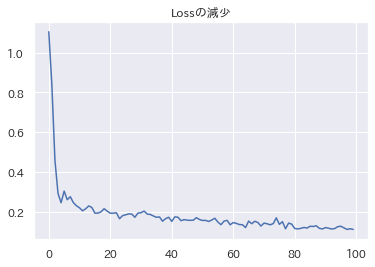

In [ ]:
plt.plot(range(i+1), losses)
plt.title("Lossの減少")
plt.show()

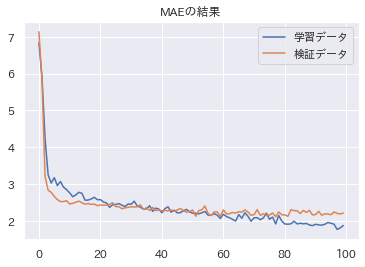

In [ ]:
plt.title("MAEの結果")
plt.plot(range(i+1), train_MAE_list)
plt.plot(range(i+1), test_MAE_list)
plt.legend(["学習データ","検証データ"])
plt.show()

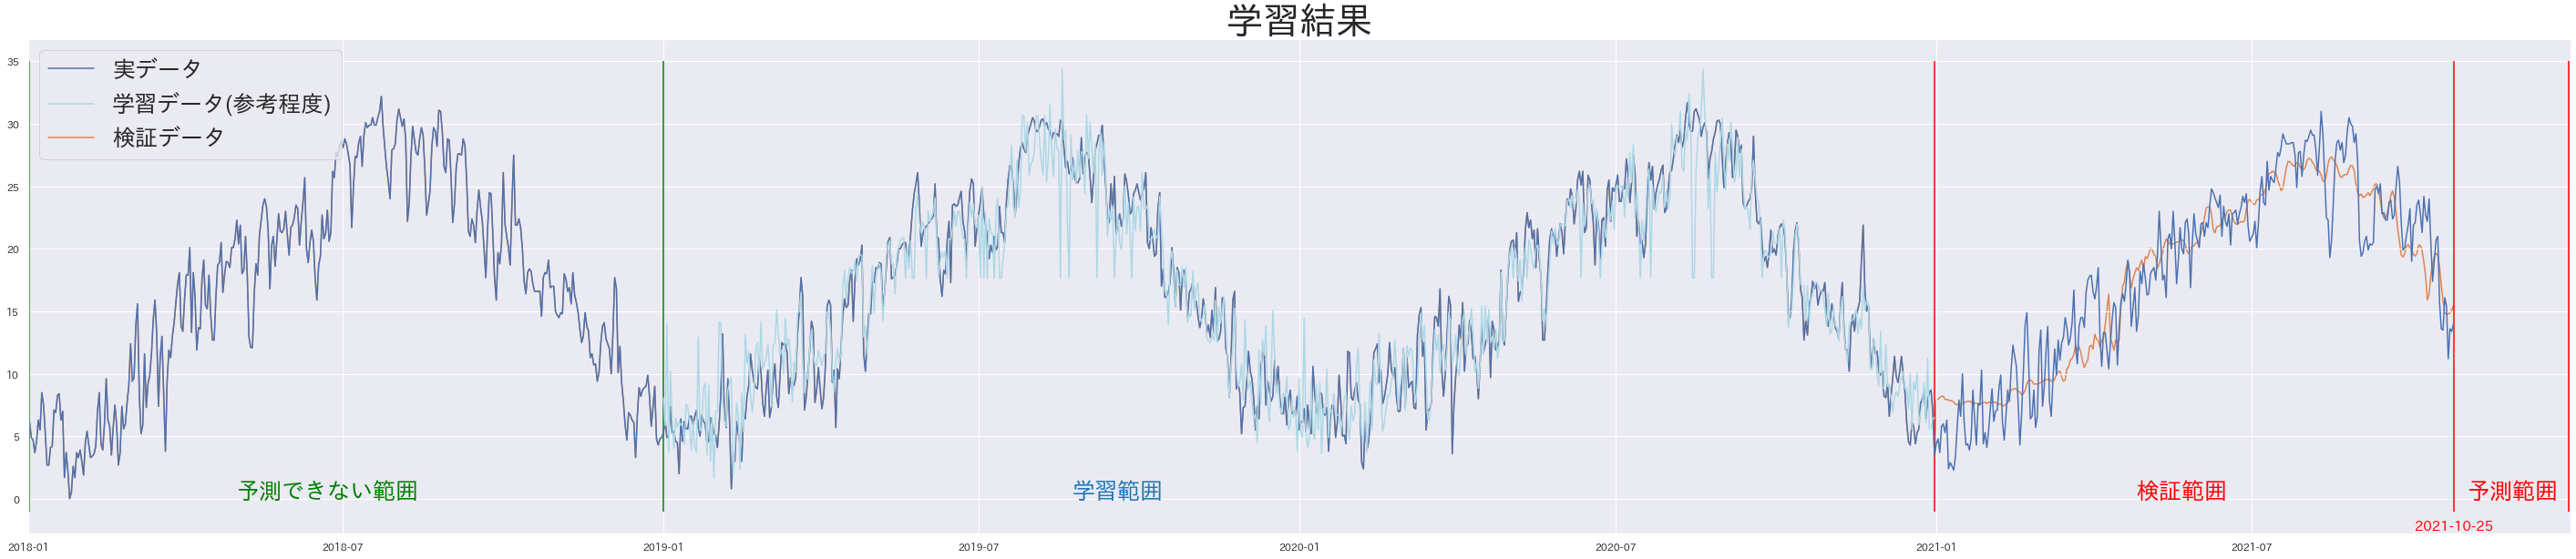

In [ ]:
plt.figure(figsize=(50,10))

plt.title("学習結果", size=40)

plt.plot(data["年月日"], scaler.inverse_transform(data["平均気温(℃)"]))                                                 #取得した実データ（青）
plt.plot(train_data[-len(y_pred_list):]["年月日"], scaler.inverse_transform(y_pred_list), color="lightblue")                #学習データ（オレンジ）
plt.plot(sequence_test_data["年月日"], scaler.inverse_transform(sequence_test_data["平均気温(℃)"]), zorder=0)       #検証データ（オレンジ）


plt.legend(["実データ", "学習データ(参考程度)", "検証データ"], loc="upper left", fontsize=25)
plt.xlim([year_2018_2021.date[0], year_2018_2021.date[-1]])

plt.vlines(data["年月日"][1], ymin=-1, ymax=35, colors="green")
plt.vlines(data["年月日"][input_size], ymin=-1, ymax=35, colors="green")

plt.vlines(train_data["年月日"][-1:], ymin=-1, ymax=35, colors="red")
plt.vlines(data["年月日"][-1:], ymin=-1, ymax=35, colors="red")
plt.vlines(year_2018_2021[-2], ymin=-1, ymax=35, colors="red")

plt.text(x=data["年月日"][120], y=0, s="予測できない範囲", c="green", size=25)
plt.text(x=data["年月日"][600], y=0, s="学習範囲", c="tab:blue", size=25)
plt.text(x=year_2018_2021[-250], y=0, s="検証範囲", c="red", size=25)
plt.text(x=year_2018_2021[-90], y=-2.5, s=datetime.datetime.date(year_2018_2021[-68]), c="red", size=15)
plt.text(x=year_2018_2021[-60], y=0, s="予測範囲", c="red", size=25)

plt.show()

## ⑦最終予測(未来の平均気温予測)

In [ ]:
prediction_dataset = dataset.copy()
prediction_dataset

年月日  平均気温(℃)
0    2018-01-01      6.2
1    2018-01-02      6.1
2    2018-01-03      4.9
3    2018-01-04      4.7
4    2018-01-05      3.7
...         ...      ...
1389 2021-10-21     15.4
1390 2021-10-22     11.2
1391 2021-10-23     13.6
1392 2021-10-24     13.4
1393 2021-10-25     14.0

[1394 rows x 2 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(prediction_dataset["平均気温(℃)"].values.reshape(len(prediction_dataset),1))
prediction_dataset["平均気温(℃)"] = scaler.transform(prediction_dataset["平均気温(℃)"].values.reshape(len(prediction_dataset),1))
prediction_dataset

年月日   平均気温(℃)
0    2018-01-01 -1.367991
1    2018-01-02 -1.380772
2    2018-01-03 -1.534151
3    2018-01-04 -1.559714
4    2018-01-05 -1.687529
...         ...       ...
1389 2021-10-21 -0.192090
1390 2021-10-22 -0.728914
1391 2021-10-23 -0.422157
1392 2021-10-24 -0.447720
1393 2021-10-25 -0.371031

[1394 rows x 2 columns]

In [ ]:
_empty_dataset =pd.DataFrame({
                                "年月日":year_2018_2021,
                                "平均気温(℃)":np.zeros(len(year_2018_2021))
                                })
_empty_dataset

年月日  平均気温(℃)
0    2018-01-01      0.0
1    2018-01-02      0.0
2    2018-01-03      0.0
3    2018-01-04      0.0
4    2018-01-05      0.0
...         ...      ...
1456 2021-12-27      0.0
1457 2021-12-28      0.0
1458 2021-12-29      0.0
1459 2021-12-30      0.0
1460 2021-12-31      0.0

[1461 rows x 2 columns]

In [ ]:
empty_dataset = _empty_dataset[_empty_dataset["年月日"].values>prediction_dataset["年月日"][-1:].values]
empty_dataset

年月日  平均気温(℃)
1394 2021-10-26      0.0
1395 2021-10-27      0.0
1396 2021-10-28      0.0
1397 2021-10-29      0.0
1398 2021-10-30      0.0
...         ...      ...
1456 2021-12-27      0.0
1457 2021-12-28      0.0
1458 2021-12-29      0.0
1459 2021-12-30      0.0
1460 2021-12-31      0.0

[67 rows x 2 columns]

In [ ]:
year_2018_2021_data = pd.concat([prediction_dataset, empty_dataset])
year_2018_2021_data

年月日   平均気温(℃)
0    2018-01-01 -1.367991
1    2018-01-02 -1.380772
2    2018-01-03 -1.534151
3    2018-01-04 -1.559714
4    2018-01-05 -1.687529
...         ...       ...
1456 2021-12-27  0.000000
1457 2021-12-28  0.000000
1458 2021-12-29  0.000000
1459 2021-12-30  0.000000
1460 2021-12-31  0.000000

[1461 rows x 2 columns]

In [ ]:
start_index = year_2018_2021_data["年月日"].index[year_2018_2021_data["年月日"]==empty_dataset["年月日"].iloc[0]].values[0]
start_index

1394

In [ ]:
# 予測
prediction_list = []
for i in range(len(empty_dataset)):
    sequence_data = year_2018_2021_data[start_index-input_size+i : start_index+i]
    
    test = sequence_data["平均気温(℃)"]
    test = torch.Tensor(test.values)
    
    test = torch.unsqueeze(torch.unsqueeze(test, 0), 0)
    test = test.to(device)
    
    model.float()
    model.eval()

    with torch.no_grad():
        prediction = model(test)
    
    prediction = prediction.item()
    year_2018_2021_data[start_index+i : start_index+i+1]["平均気温(℃)"] = prediction
    
    prediction_list.append(prediction)

In [ ]:
# 標準化をもとに戻す
year_2018_2021_data["平均気温(℃)"] = scaler.inverse_transform(year_2018_2021_data["平均気温(℃)"].values.reshape(len(year_2018_2021_data), 1))
year_2018_2021_data

年月日   平均気温(℃)
0    2018-01-01  6.200000
1    2018-01-02  6.100000
2    2018-01-03  4.900000
3    2018-01-04  4.700000
4    2018-01-05  3.700000
...         ...       ...
1456 2021-12-27  8.195485
1457 2021-12-28  7.944800
1458 2021-12-29  7.830362
1459 2021-12-30  7.779651
1460 2021-12-31  7.767694

[1461 rows x 2 columns]

### 検証の結果

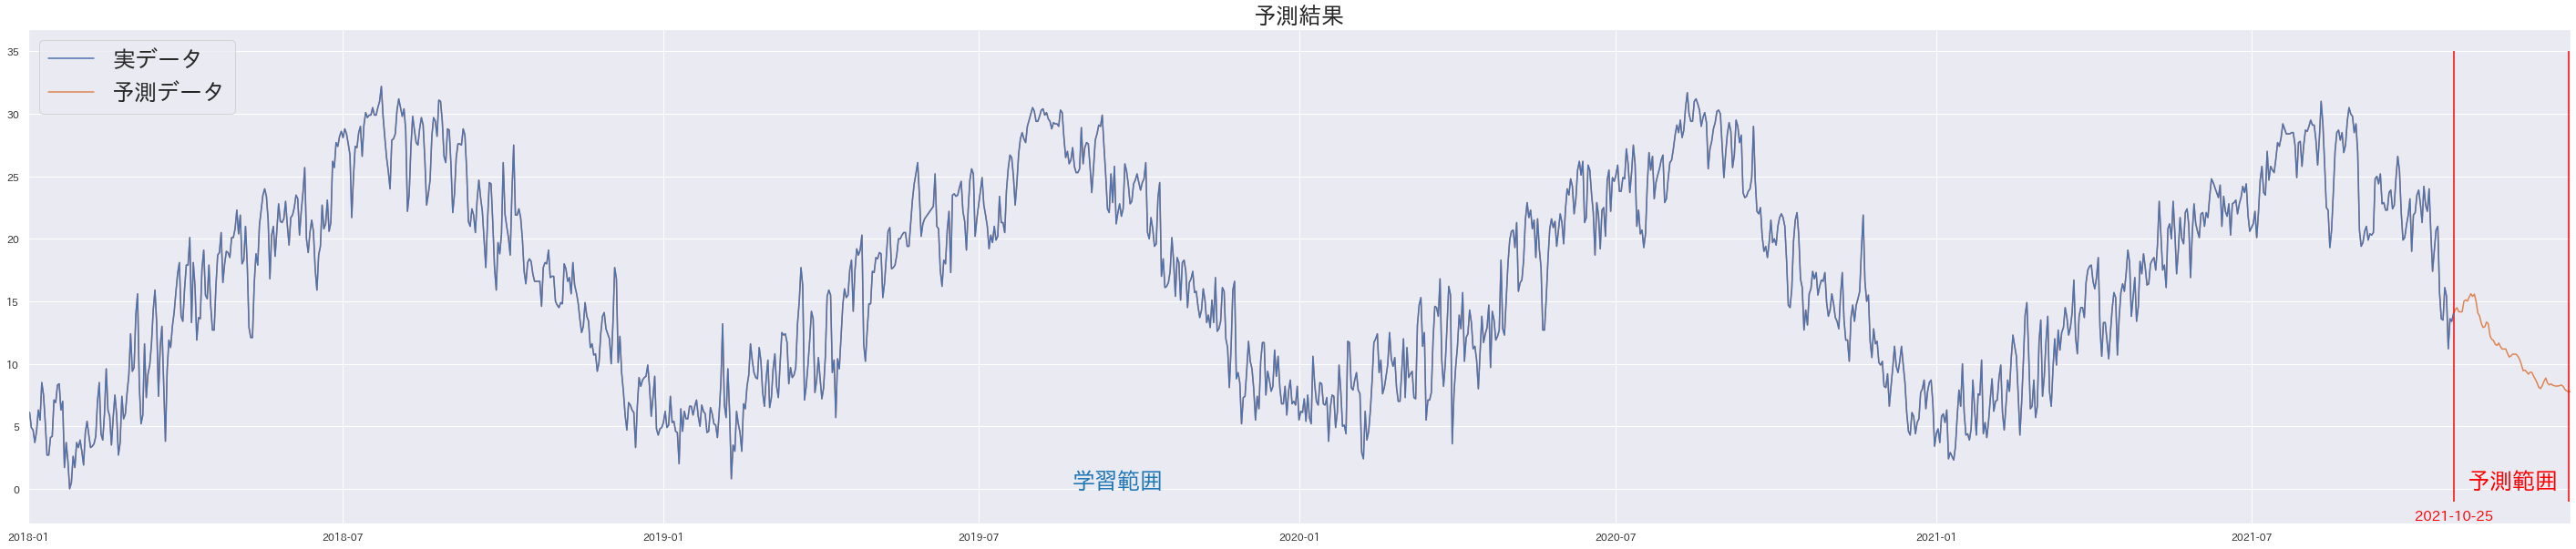

In [ ]:
plt.figure(figsize=(50,10))

plt.title("予測結果", size=25)

plt.plot(dataset["年月日"], dataset["平均気温(℃)"], zorder=2)                                    # 実データ(青)
plt.plot(year_2018_2021_data["年月日"], year_2018_2021_data["平均気温(℃)"], zorder=1)       #予測したデータ（オレンジ）

plt.legend(["実データ", "予測データ"],loc="upper left", fontsize=25)
plt.xlim([year_2018_2021.date[0], year_2018_2021.date[-1]])

plt.vlines(dataset["年月日"][-1:], ymin=-1, ymax=35, colors="red")
plt.vlines(year_2018_2021[-2], ymin=-1, ymax=35, colors="red")

plt.text(x=dataset["年月日"][600], y=0, s="学習範囲", c="tab:blue", size=25)
plt.text(x=year_2018_2021[-90], y=-2.5, s=datetime.datetime.date(year_2018_2021[-68]), c="red", size=15)
plt.text(x=year_2018_2021[-60], y=0, s="予測範囲", c="red", size=25)

plt.show()

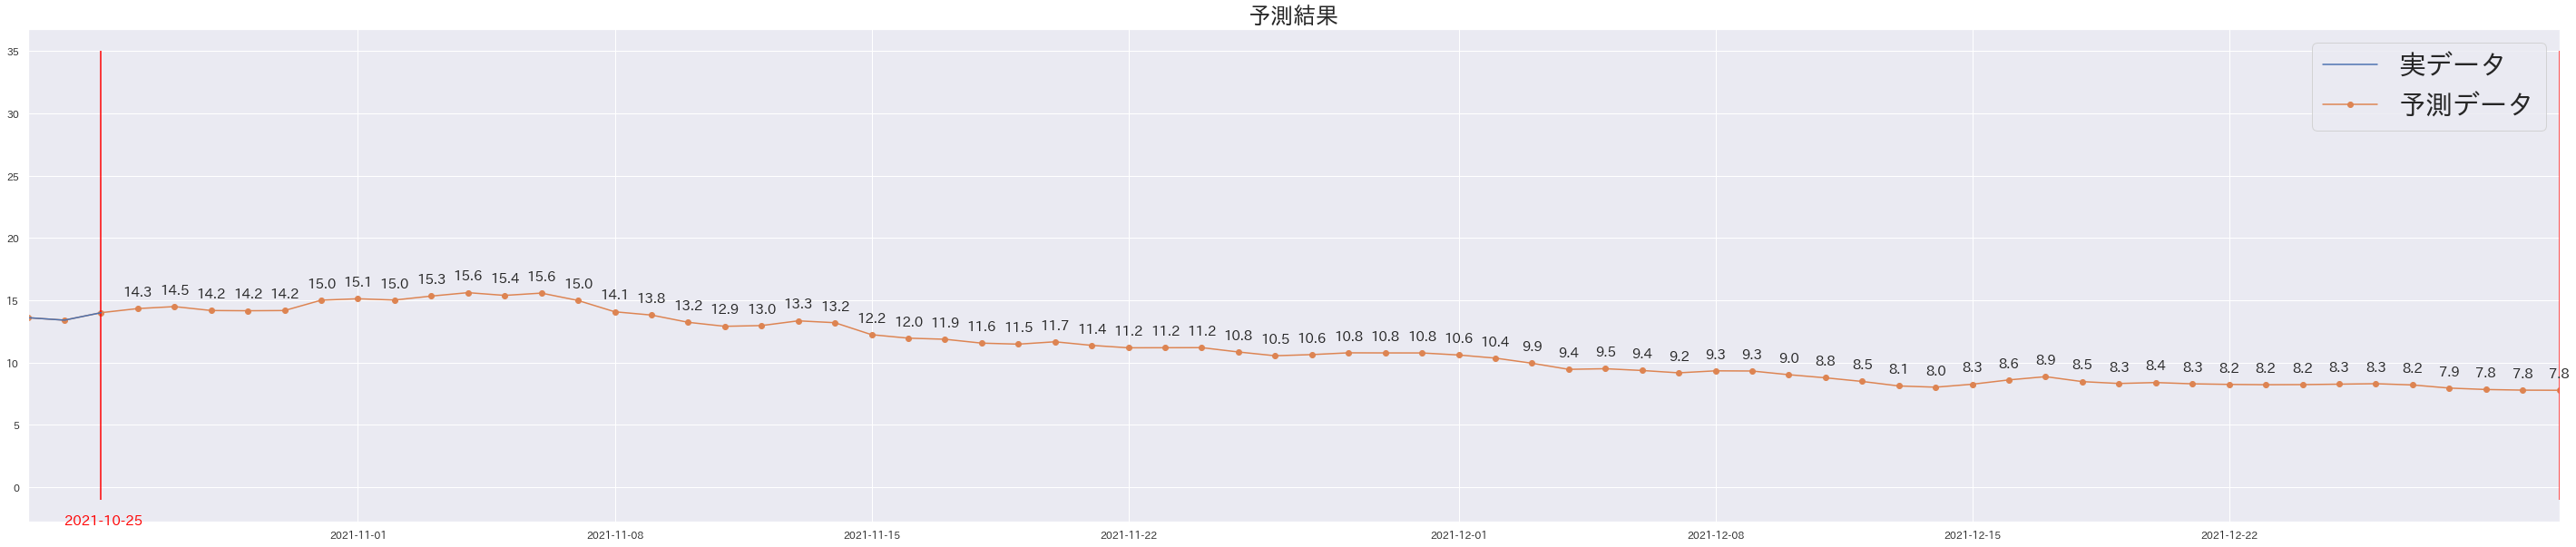

In [ ]:
plt.figure(figsize=(50,10))

plt.title("予測結果", size=25)

plt.plot(dataset["年月日"], dataset["平均気温(℃)"], zorder=2)                                    # 実データ(青)
plt.plot(year_2018_2021_data["年月日"], year_2018_2021_data["平均気温(℃)"], zorder=1, marker="o")       #予測したデータ（オレンジ）

plt.legend(["実データ", "予測データ"],loc="upper right", fontsize=30)
plt.xlim([year_2018_2021.date[-70], year_2018_2021.date[-1]])

plt.vlines(dataset["年月日"][-1:], ymin=-1, ymax=35, colors="red")
plt.vlines(year_2018_2021[-1], ymin=-1, ymax=35, colors="red")

plt.text(x=year_2018_2021[-69], y=-3, s=datetime.datetime.date(year_2018_2021[-68]), c="red", size=15)

for i in range(left_date):
  plt.text(x=year_2018_2021_data[-left_date:][i:i+1].iloc[:,0].values[0],
          y=year_2018_2021_data[-left_date:][i:i+1].iloc[:,1].values[0]+1,
          s=np.round(year_2018_2021_data[-left_date:][i:i+1].iloc[:,1].values[0],1), 
          ha="center", size=15)

plt.show()